In [216]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Modeling_and_Society

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Modeling_and_Society


In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
import warnings
warnings.filterwarnings("ignore")

In [219]:
energy_data = pd.read_csv('energy_dataset.csv.txt')
energy_data

time  generation biomass  \
0      2015-01-01 00:00:00+01:00               447.0   
1      2015-01-01 01:00:00+01:00               449.0   
2      2015-01-01 02:00:00+01:00               448.0   
3      2015-01-01 03:00:00+01:00               438.0   
4      2015-01-01 04:00:00+01:00               428.0   
...                          ...                 ...   
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  \
0                                     329.0   
1                                     328.0   
2                                     323.0   
3                                     254.0   
4                                     187.0   
...                                     ...   
35059                                   0.0   
35060                                   0.0   
35061                                   0.0   
35062                                   0.0   
35063                                   0.0   

       generation fossil coal-derived gas  generation fossil gas  \
0                                     0.0                 4844.0   
1                                     0.0                 5196.0   
2                                     0.0                 4857.0   
3                                     0.0                 4314.0   
4                                     0.0                 4130.0   
...                                   ...                    ...   
35059                                 0.0                 7634.0   
35060                                 0.0                 7241.0   
35061                                 0.0                 7025.0   
35062                                 0.0                 6562.0   
35063                                 0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
0                           4821.0                  162.0   
1                           4755.0                  158.0   
2                           4581.0                  157.0   
3                           4131.0                  160.0   
4                           3840.0                  156.0   
...                            ...                    ...   
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation fossil oil shale  generation fossil peat  \
0                              0.0                     0.0   
1                              0.0                     0.0   
2                              0.0                     0.0   
3                              0.0                     0.0   
4                              0.0                     0.0   
...                            ...                     ...   
35059                          0.0                     0.0   
35060                          0.0                     0.0   
35061                          0.0                     0.0   
35062                          0.0                     0.0   
35063                          0.0                     0.0   

       generation geothermal  ...  generation waste  generation wind offshore  \
0                        0.0  ...             196.0                       0.0   
1                        0.0  ...             195.0                       0.0   
2                        0.0  ...             196.0                       0.0   
3                        0.0  ...             191.0                       0.0   
4                        0.0  ...             189.0                       0.0   
...      

In [220]:
print(energy_data.info())
print(energy_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [221]:
energy_data.nunique()

time                                           35064
generation biomass                               423
generation fossil brown coal/lignite             956
generation fossil coal-derived gas                 1
generation fossil gas                           8297
generation fossil hard coal                     7266
generation fossil oil                            321
generation fossil oil shale                        1
generation fossil peat                             1
generation geothermal                              1
generation hydro pumped storage aggregated         0
generation hydro pumped storage consumption     3311
generation hydro run-of-river and poundage      1684
generation hydro water reservoir                7029
generation marine                                  1
generation nuclear                              2388
generation other                                 103
generation other renewable                        78
generation solar                              

In [222]:
energy_data.duplicated().value_counts()

False    35064
Name: count, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7e9b10c1ba30>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9b10c31d80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9b10c1b700>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9b10c30430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9b10c30640>],
 'means': []}

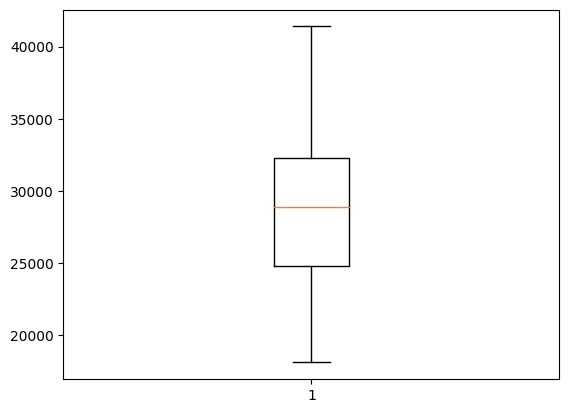

In [223]:
#using boxplots to look for outliers - none for this column
plt.boxplot(energy_data["total load forecast"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e9b10ca98a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9b10ca9de0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9b10ca9600>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9b10caa200>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9b10caa4a0>],
 'means': []}

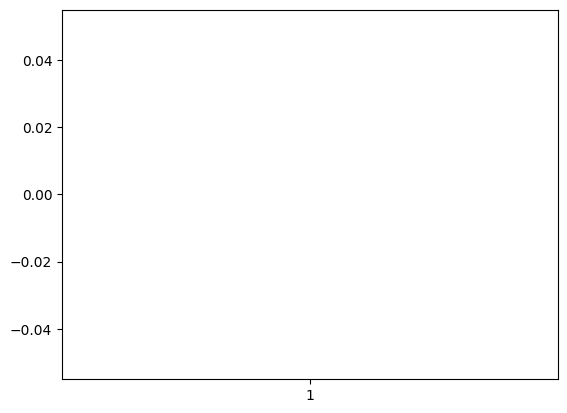

In [224]:
plt.boxplot(energy_data["generation fossil gas"]) #need to investigate whats going on here

{'whiskers': [<matplotlib.lines.Line2D at 0x7e9b10b0abc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9b10b0b100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9b10b0a920>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9b10b0b640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9b10b0b8e0>],
 'means': []}

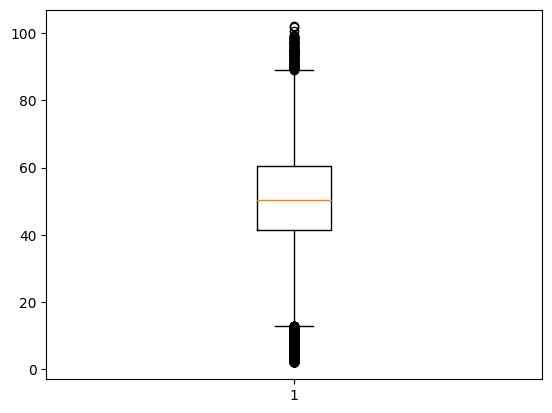

In [225]:
plt.boxplot(energy_data["price day ahead"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7e9b10b94af0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9b10b94f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9b10b94850>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9b10b95450>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9b10b956f0>],
 'means': []}

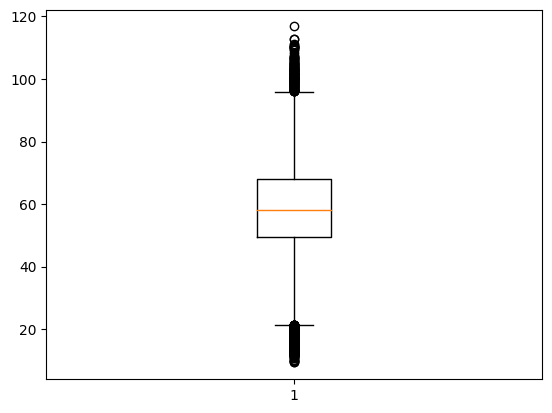

In [226]:
plt.boxplot(energy_data["price actual"])

<Axes: >

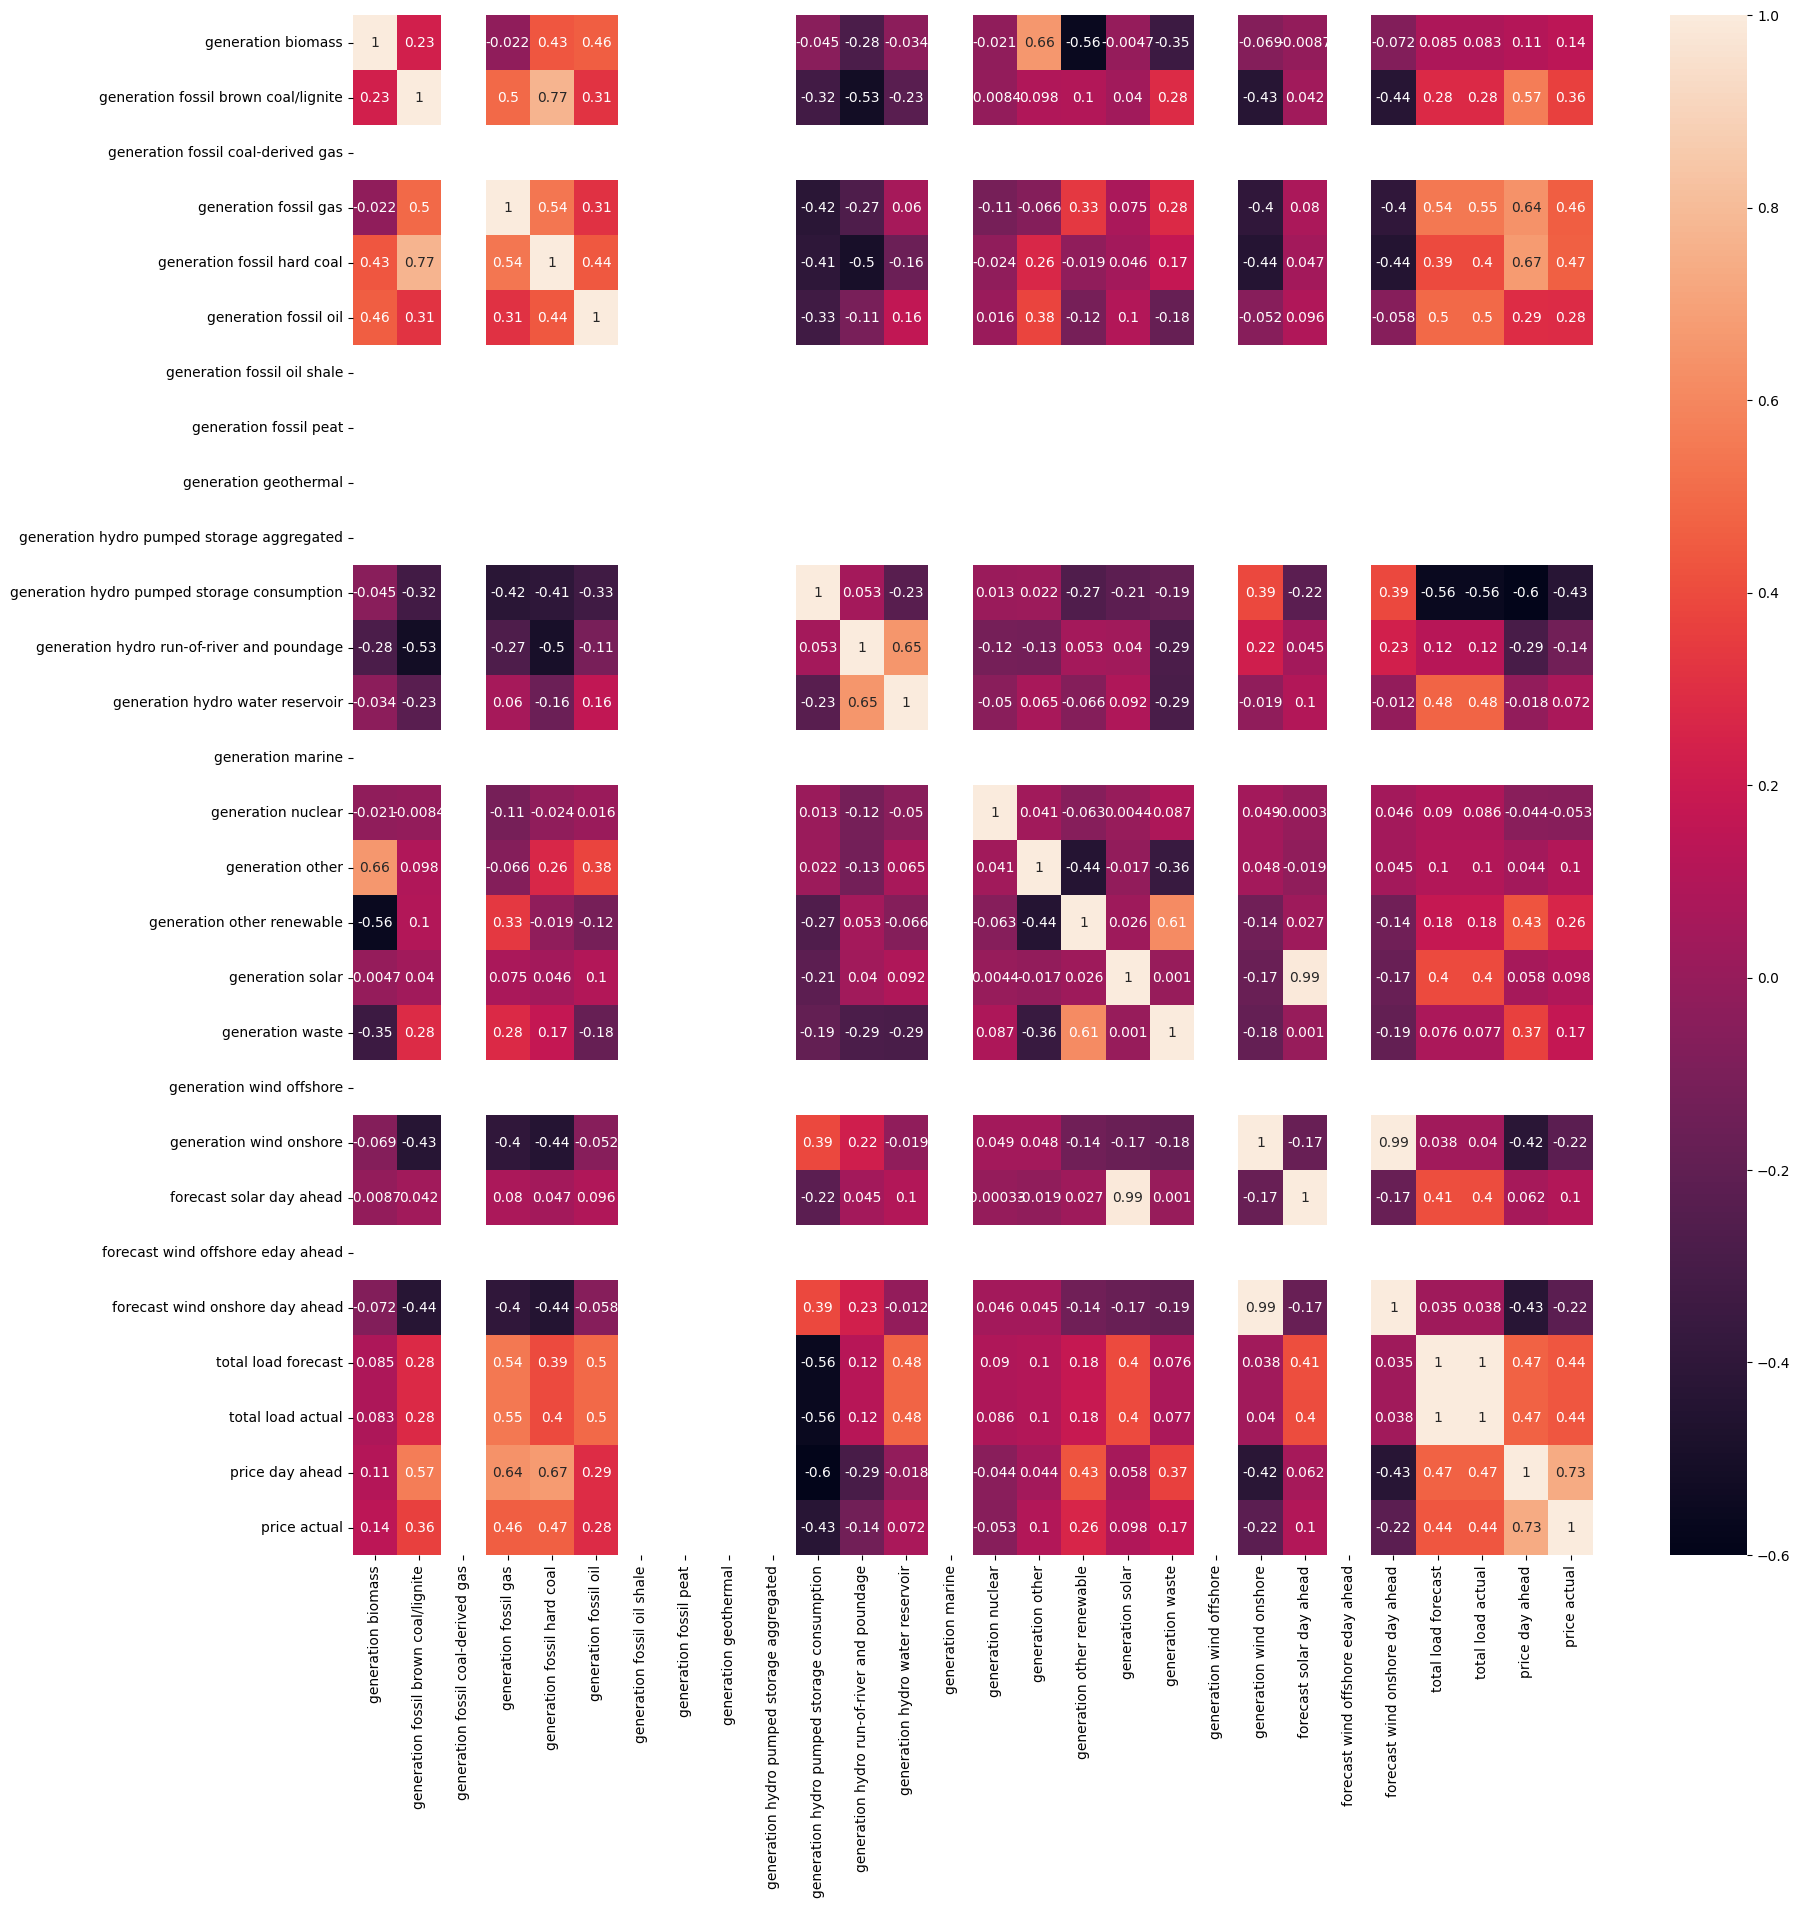

In [227]:
energy_data_mat = energy_data.drop('time', axis=1)
mat = energy_data_mat.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(mat, annot=True)
#initial correlation matrix has a lot of gaps due to columns that are all zeros

In [228]:
# new df that drops a lot of stuff thats just zeros everywhere (it makes the heatmap look nicer and I assume we won;t be using these values anyway)
energy_data_cleaned = energy_data.drop(['generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated', 'generation marine', 'generation wind offshore', 'forecast wind offshore eday ahead' ], axis=1)
energy_data_cleaned_mat = energy_data_cleaned.drop('time', axis=1)

<Axes: >

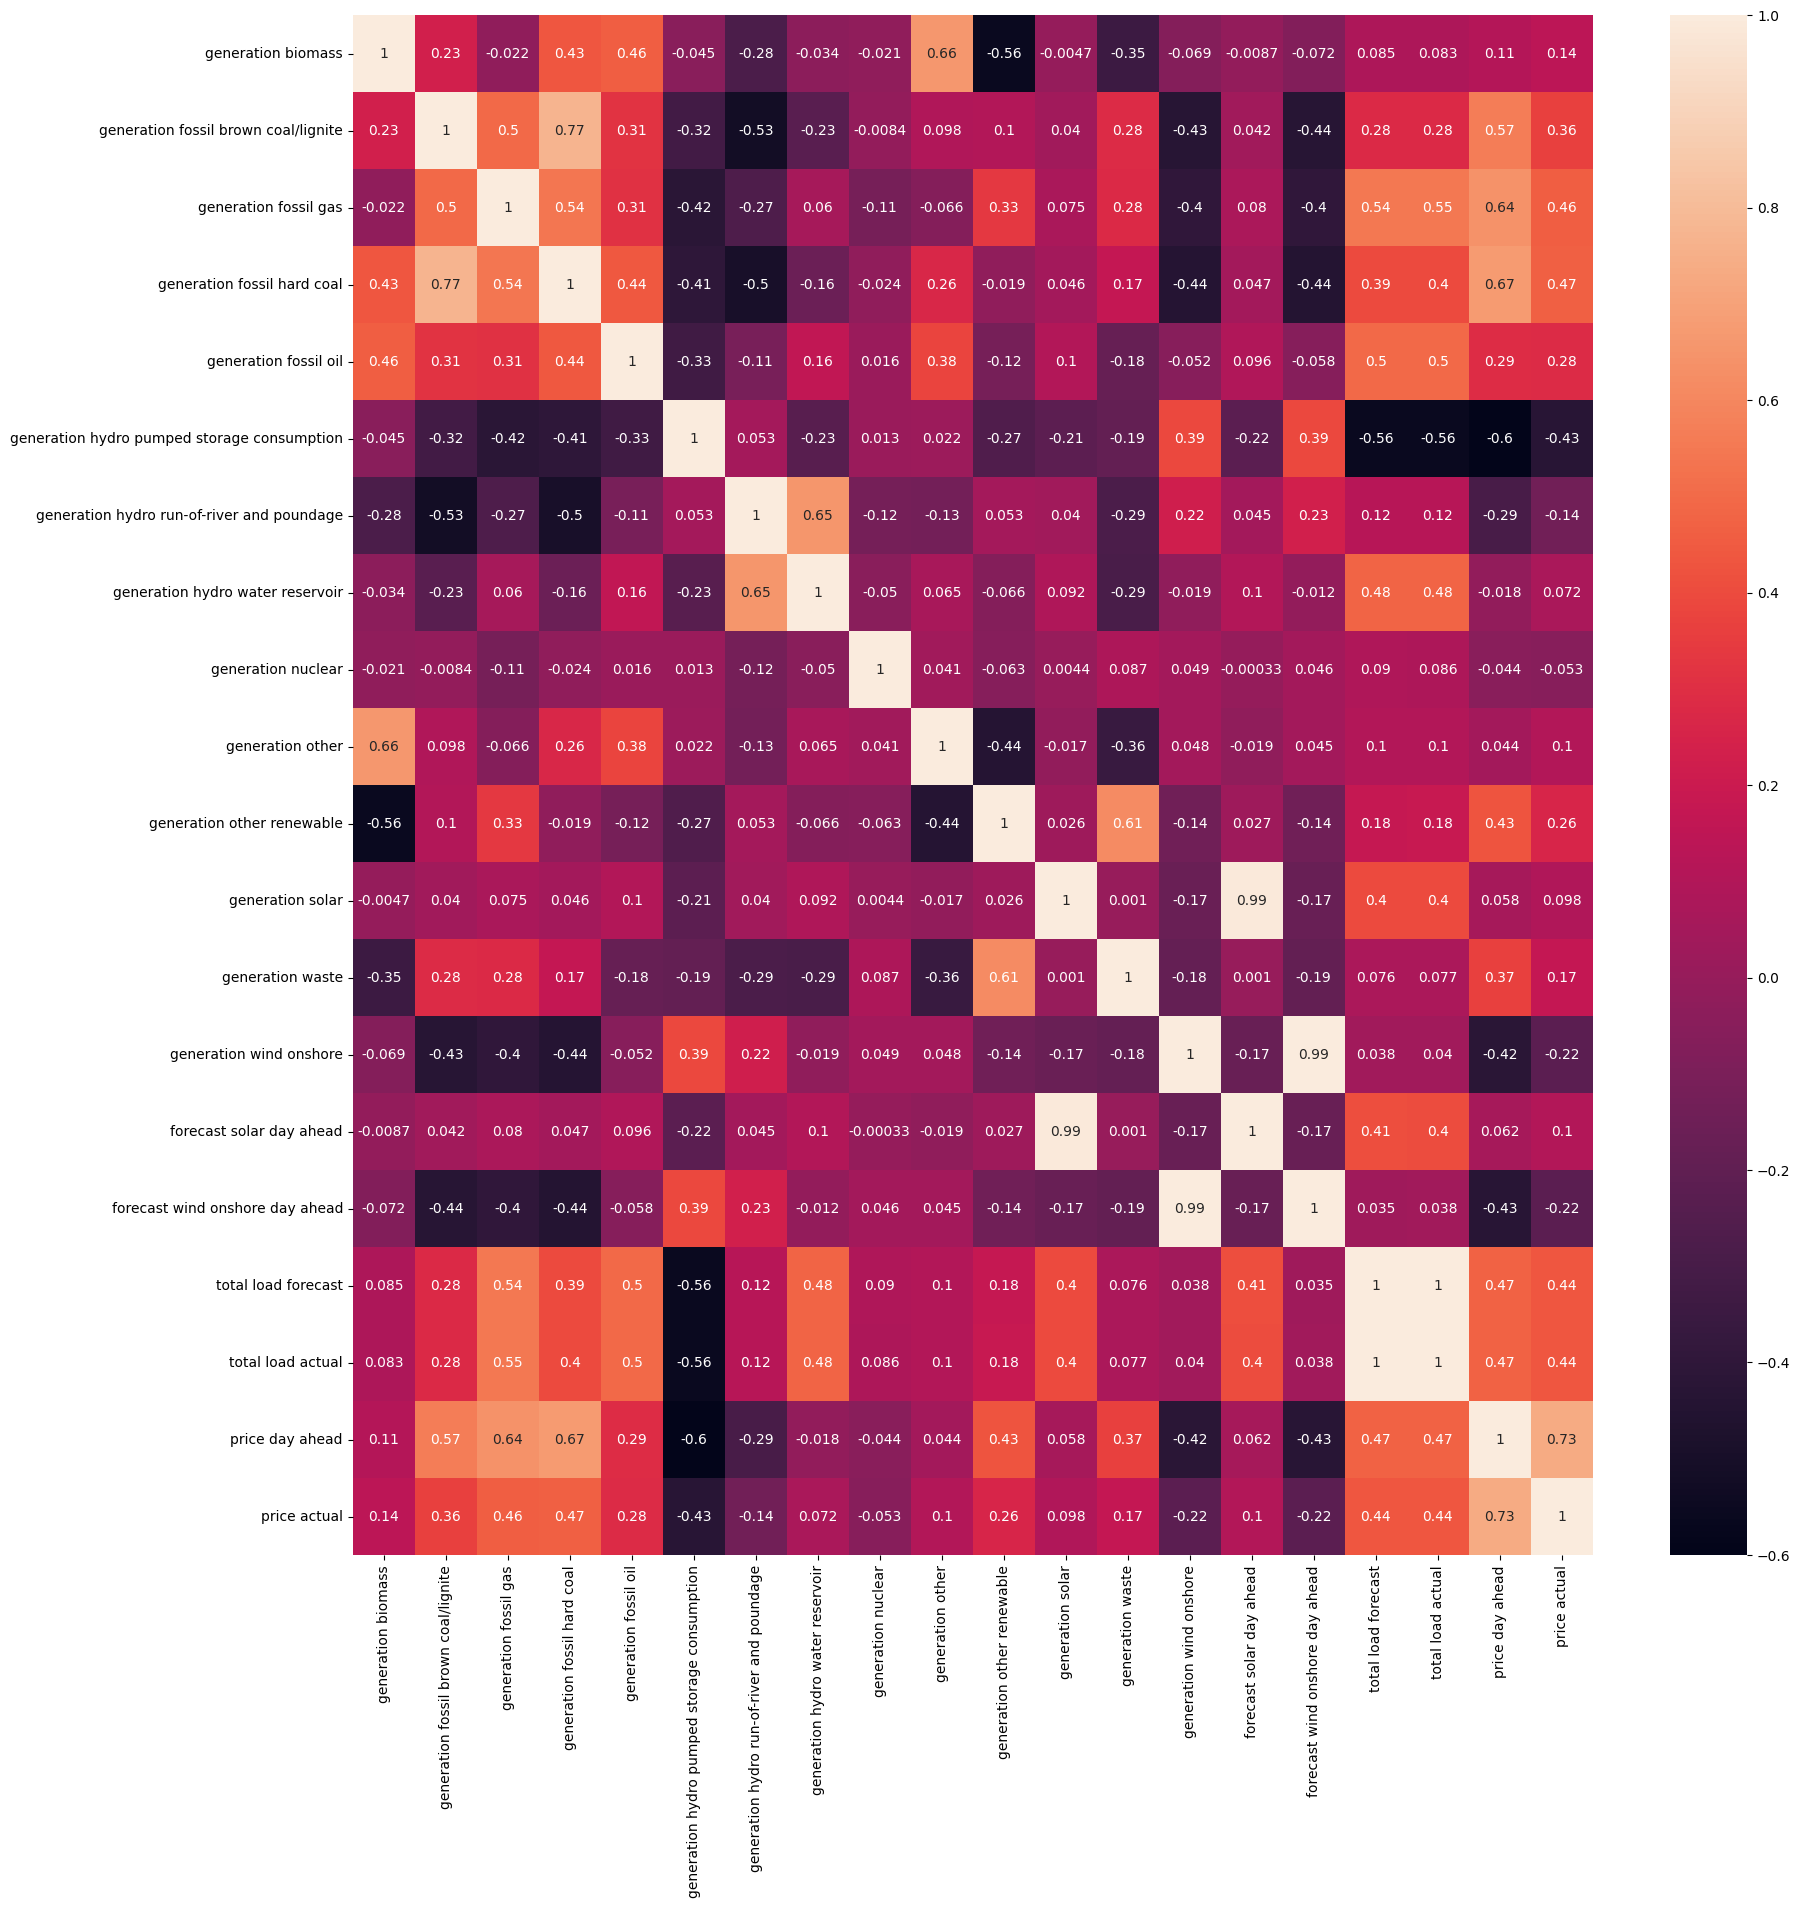

In [229]:
mat = energy_data_cleaned_mat.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(mat, annot=True)

In [230]:
#adding a time increment column - ech row assigned a unique, incrementing number - can be used for change over time, subsetting dataframe
energy_data_cleaned_time_columns = energy_data_cleaned
energy_data_cleaned_time_columns['time increment'] = np.nan
for ind in energy_data_cleaned_time_columns.index:
    energy_data_cleaned_time_columns['time increment'][ind] = ind
energy_data_cleaned_time_columns.tail()

time  generation biomass  \
35059  2018-12-31 19:00:00+01:00               297.0   
35060  2018-12-31 20:00:00+01:00               296.0   
35061  2018-12-31 21:00:00+01:00               292.0   
35062  2018-12-31 22:00:00+01:00               293.0   
35063  2018-12-31 23:00:00+01:00               290.0   

       generation fossil brown coal/lignite  generation fossil gas  \
35059                                   0.0                 7634.0   
35060                                   0.0                 7241.0   
35061                                   0.0                 7025.0   
35062                                   0.0                 6562.0   
35063                                   0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation hydro pumped storage consumption  \
35059                                          1.0   
35060                                          1.0   
35061                                         50.0   
35062                                        108.0   
35063                                        108.0   

       generation hydro run-of-river and poundage  \
35059                                      1135.0   
35060                                      1172.0   
35061                                      1148.0   
35062                                      1128.0   
35063                                      1069.0   

       generation hydro water reservoir  generation nuclear  ...  \
35059                            4836.0              6073.0  ...   
35060                            3931.0              6074.0  ...   
35061                            2831.0              6076.0  ...   
35062                            2068.0              6075.0  ...   
35063                            1686.0              6075.0  ...   

       generation solar  generation waste  generation wind onshore  \
35059              85.0             277.0                   3113.0   
35060              33.0             280.0                   3288.0   
35061              31.0             286.0                   3503.0   
35062              31.0             287.0                   3586.0   
35063              31.0             287.0                   3651.0   

       forecast solar day ahead  forecast wind onshore day ahead  \
35059                      96.0                           3253.0   
35060                      51.0                           3353.0   
35061                      36.0                           3404.0   
35062                      29.0                           3273.0   
35063                      26.0                           3117.0   

       total load forecast  total load actual  price day ahead  price actual  \
35059              30619.0            30653.0            68.85         77.02   
35060              29932.0            29735.0            68.40         76.16   
35061              27903.0            28071.0            66.88         74.30   
35062              25450.0            25801.0            63.93         69.89   
35063              24424.0            24455.0            64.27         69.88   

       time increment  
35059         35059.0  
35060         35060.0  
35061         35061.0  
35062         35062.0  
35063         35063.0  

[5 rows x 22 columns]

In [231]:
#cleans up time column a bit - eliminates information useless to us
for ind in energy_data_cleaned_time_columns.index:
    energy_data_cleaned_time_columns['time'][ind] = energy_data_cleaned_time_columns['time'][ind][0:16]
energy_data_cleaned_time_columns.tail()

time  generation biomass  \
35059  2018-12-31 19:00               297.0   
35060  2018-12-31 20:00               296.0   
35061  2018-12-31 21:00               292.0   
35062  2018-12-31 22:00               293.0   
35063  2018-12-31 23:00               290.0   

       generation fossil brown coal/lignite  generation fossil gas  \
35059                                   0.0                 7634.0   
35060                                   0.0                 7241.0   
35061                                   0.0                 7025.0   
35062                                   0.0                 6562.0   
35063                                   0.0                 6926.0   

       generation fossil hard coal  generation fossil oil  \
35059                       2628.0                  178.0   
35060                       2566.0                  174.0   
35061                       2422.0                  168.0   
35062                       2293.0                  163.0   
35063                       2166.0                  163.0   

       generation hydro pumped storage consumption  \
35059                                          1.0   
35060                                          1.0   
35061                                         50.0   
35062                                        108.0   
35063                                        108.0   

       generation hydro run-of-river and poundage  \
35059                                      1135.0   
35060                                      1172.0   
35061                                      1148.0   
35062                                      1128.0   
35063                                      1069.0   

       generation hydro water reservoir  generation nuclear  ...  \
35059                            4836.0              6073.0  ...   
35060                            3931.0              6074.0  ...   
35061                            2831.0              6076.0  ...   
35062                            2068.0              6075.0  ...   
35063                            1686.0              6075.0  ...   

       generation solar  generation waste  generation wind onshore  \
35059              85.0             277.0                   3113.0   
35060              33.0             280.0                   3288.0   
35061              31.0             286.0                   3503.0   
35062              31.0             287.0                   3586.0   
35063              31.0             287.0                   3651.0   

       forecast solar day ahead  forecast wind onshore day ahead  \
35059                      96.0                           3253.0   
35060                      51.0                           3353.0   
35061                      36.0                           3404.0   
35062                      29.0                           3273.0   
35063                      26.0                           3117.0   

       total load forecast  total load actual  price day ahead  price actual  \
35059              30619.0            30653.0            68.85         77.02   
35060              29932.0            29735.0            68.40         76.16   
35061              27903.0            28071.0            66.88         74.30   
35062              25450.0            25801.0            63.93         69.89   
35063              24424.0            24455.0            64.27         69.88   

       time increment  
35059         35059.0  
35060         35060.0  
35061         35061.0  
35062         35062.0  
35063         35063.0  

[5 rows x 22 columns]

In [232]:
# adds a column containing 1 if row is at midnight, 0 if not - can be used for subsetting graph to find changes in different times of day
# proof of concept, can create others based on this
energy_data_cleaned_time_columns['midnight'] = np.nan
for ind in energy_data_cleaned_time_columns.index:
    if energy_data_cleaned_time_columns['time increment'][ind] % 24 == 0:
       energy_data_cleaned_time_columns['midnight'][ind] = 1
    else:
       energy_data_cleaned_time_columns['midnight'][ind] = 0
#commenting out this line to save space, but it shows proof that this code works
#energy_data_cleaned_time_columns.head(26)

In [233]:
# adds a column containing 1 if row is in January, 0 if not - can be used for subsetting graph to find changes between months - could also use to create columns for seasons
# proof of concept, can create others based on this
energy_data_cleaned_time_columns['January'] = np.nan
for ind in energy_data_cleaned_time_columns.index:
    if energy_data_cleaned_time_columns['time'][ind][5:7] == '01':
       energy_data_cleaned_time_columns['January'][ind] = 1
    else:
       energy_data_cleaned_time_columns['January'][ind] = 0
energy_data_cleaned_time_columns.head()

time  generation biomass  generation fossil brown coal/lignite  \
0  2015-01-01 00:00               447.0                                 329.0   
1  2015-01-01 01:00               449.0                                 328.0   
2  2015-01-01 02:00               448.0                                 323.0   
3  2015-01-01 03:00               438.0                                 254.0   
4  2015-01-01 04:00               428.0                                 187.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.0                  158.0   
2                 4857.0                       4581.0                  157.0   
3                 4314.0                       4131.0                  160.0   
4                 4130.0                       3840.0                  156.0   

   generation hydro pumped storage consumption  \
0                                        863.0   
1                                        920.0   
2                                       1164.0   
3                                       1503.0   
4                                       1826.0   

   generation hydro run-of-river and poundage  \
0                                      1051.0   
1                                      1009.0   
2                                       973.0   
3                                       949.0   
4                                       953.0   

   generation hydro water reservoir  generation nuclear  ...  \
0                            1899.0              7096.0  ...   
1                            1658.0              7096.0  ...   
2                            1371.0              7099.0  ...   
3                             779.0              7098.0  ...   
4                             720.0              7097.0  ...   

   generation wind onshore  forecast solar day ahead  \
0                   6378.0                      17.0   
1                   5890.0                      16.0   
2                   5461.0                       8.0   
3                   5238.0                       2.0   
4                   4935.0                       9.0   

   forecast wind onshore day ahead  total load forecast  total load actual  \
0                           6436.0              26118.0            25385.0   
1                           5856.0              24934.0            24382.0   
2                           5454.0              23515.0            22734.0   
3                           5151.0              22642.0            21286.0   
4                           4861.0              21785.0            20264.0   

   price day ahead  price actual  time increment  midnight  January  
0            50.10         65.41             0.0       1.0      1.0  
1            48.10         64.92             1.0       0.0      1.0  
2            47.33         64.48             2.0       0.0      1.0  
3            42.27         59.32             3.0       0.0      1.0  
4            38.41         56.04             4.0       0.0      1.0  

[5 rows x 24 columns]

58.02


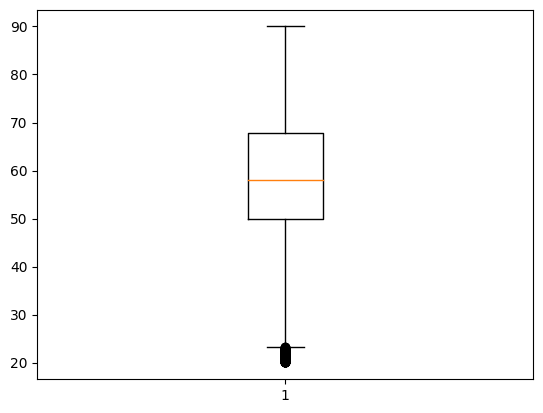

In [234]:
#remove some outliers from price actual

#find median
median = energy_data_cleaned_time_columns['price actual'].median()
print(median)

# Replace outliers with median value
energy_data_cleaned_time_columns.loc[energy_data_cleaned_time_columns['price actual'] > 90, 'price actual'] = median
energy_data_cleaned_time_columns.loc[energy_data_cleaned_time_columns['price actual'] < 20, 'price actual'] = median
plt.boxplot(energy_data_cleaned_time_columns["price actual"])
plt.show()

28901.0


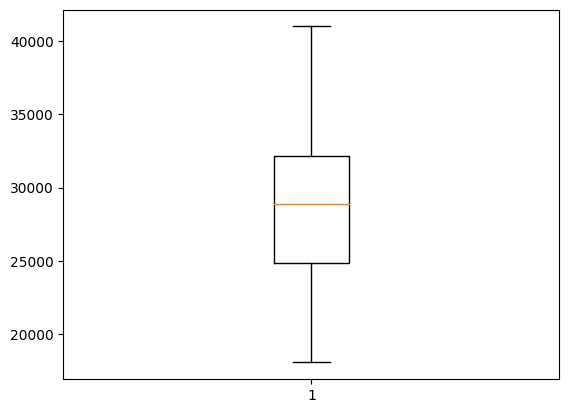

In [235]:
#find median
median = energy_data_cleaned_time_columns['total load actual'].median()
print(median)
energy_data_cleaned_time_columns['total load actual'].fillna(median, inplace=True)
plt.boxplot(energy_data_cleaned_time_columns["total load actual"])
plt.show()

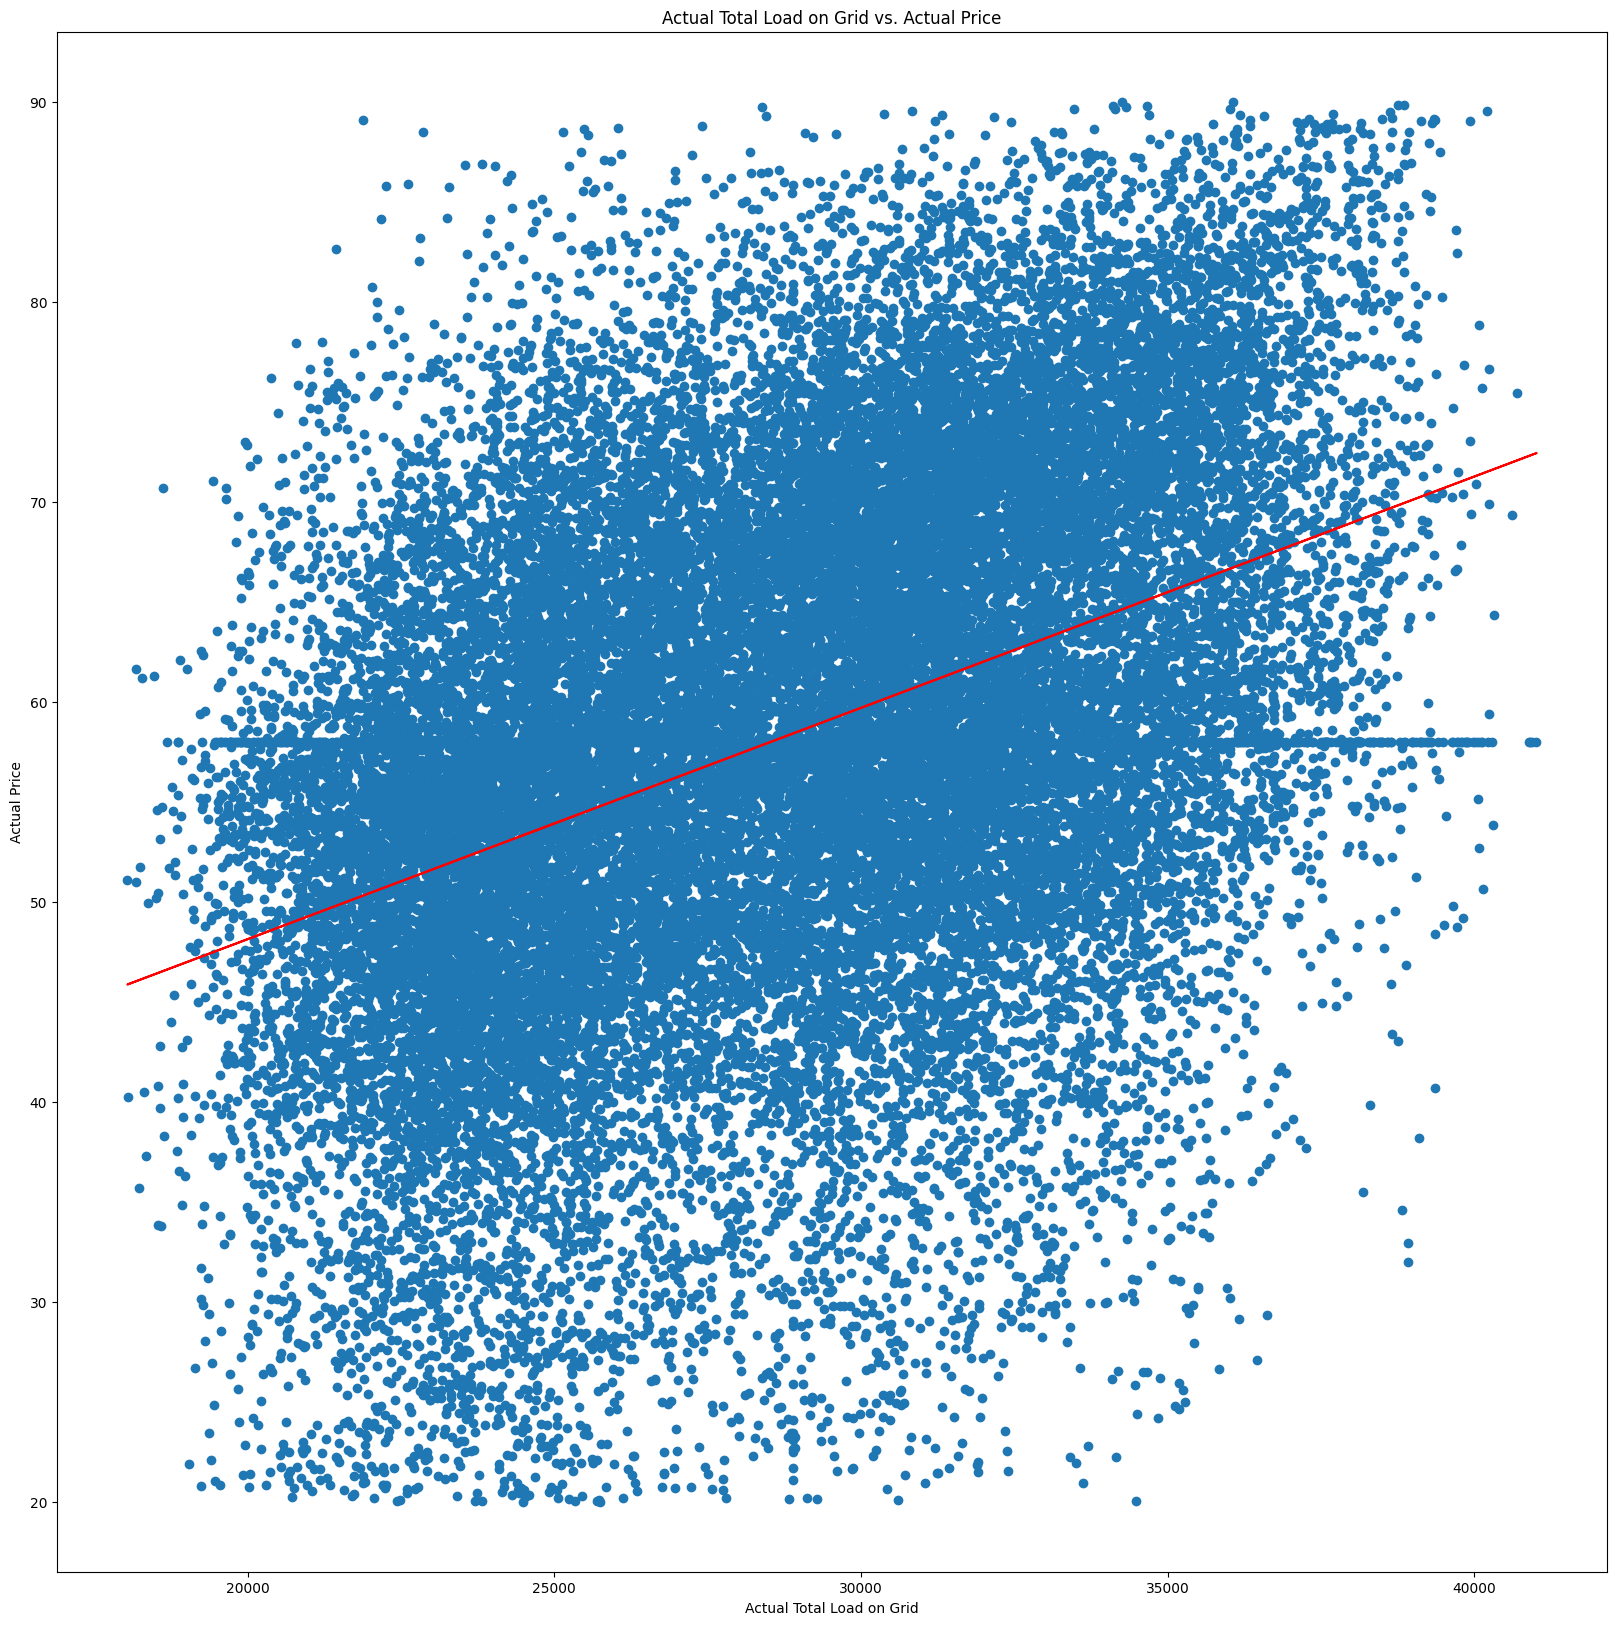

In [236]:
#tried two scatter plots with highest correlation, both do not seem to meet conditions of linear regression
plt.figure(figsize=(20, 20))
a, b = np.polyfit(energy_data_cleaned_time_columns['total load actual'], energy_data_cleaned_time_columns['price actual'], 1)
plt.xlabel("Actual Total Load on Grid")
plt.ylabel("Actual Price")
plt.title("Actual Total Load on Grid vs. Actual Price")
plt.scatter(energy_data_cleaned_time_columns['total load actual'], energy_data_cleaned_time_columns['price actual'])
plt.plot(energy_data_cleaned_time_columns['total load actual'], a*energy_data_cleaned_time_columns['total load actual']+b, color='red')

4474.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7e9b0f3406d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9b0f340c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9b0f340430>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9b0f341150>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9b0f3413f0>],
 'means': []}

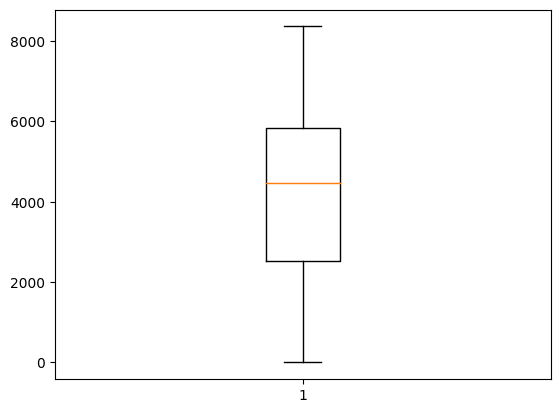

In [237]:
median = energy_data_cleaned_time_columns['generation fossil hard coal'].median()
print(median)
energy_data_cleaned_time_columns["generation fossil hard coal"].fillna(median, inplace=True)
energy_data_cleaned_time_columns.loc[energy_data_cleaned_time_columns['generation fossil hard coal'] > 15000, 'generation fossil hard coal'] = median
plt.boxplot(energy_data_cleaned_time_columns["generation fossil hard coal"])

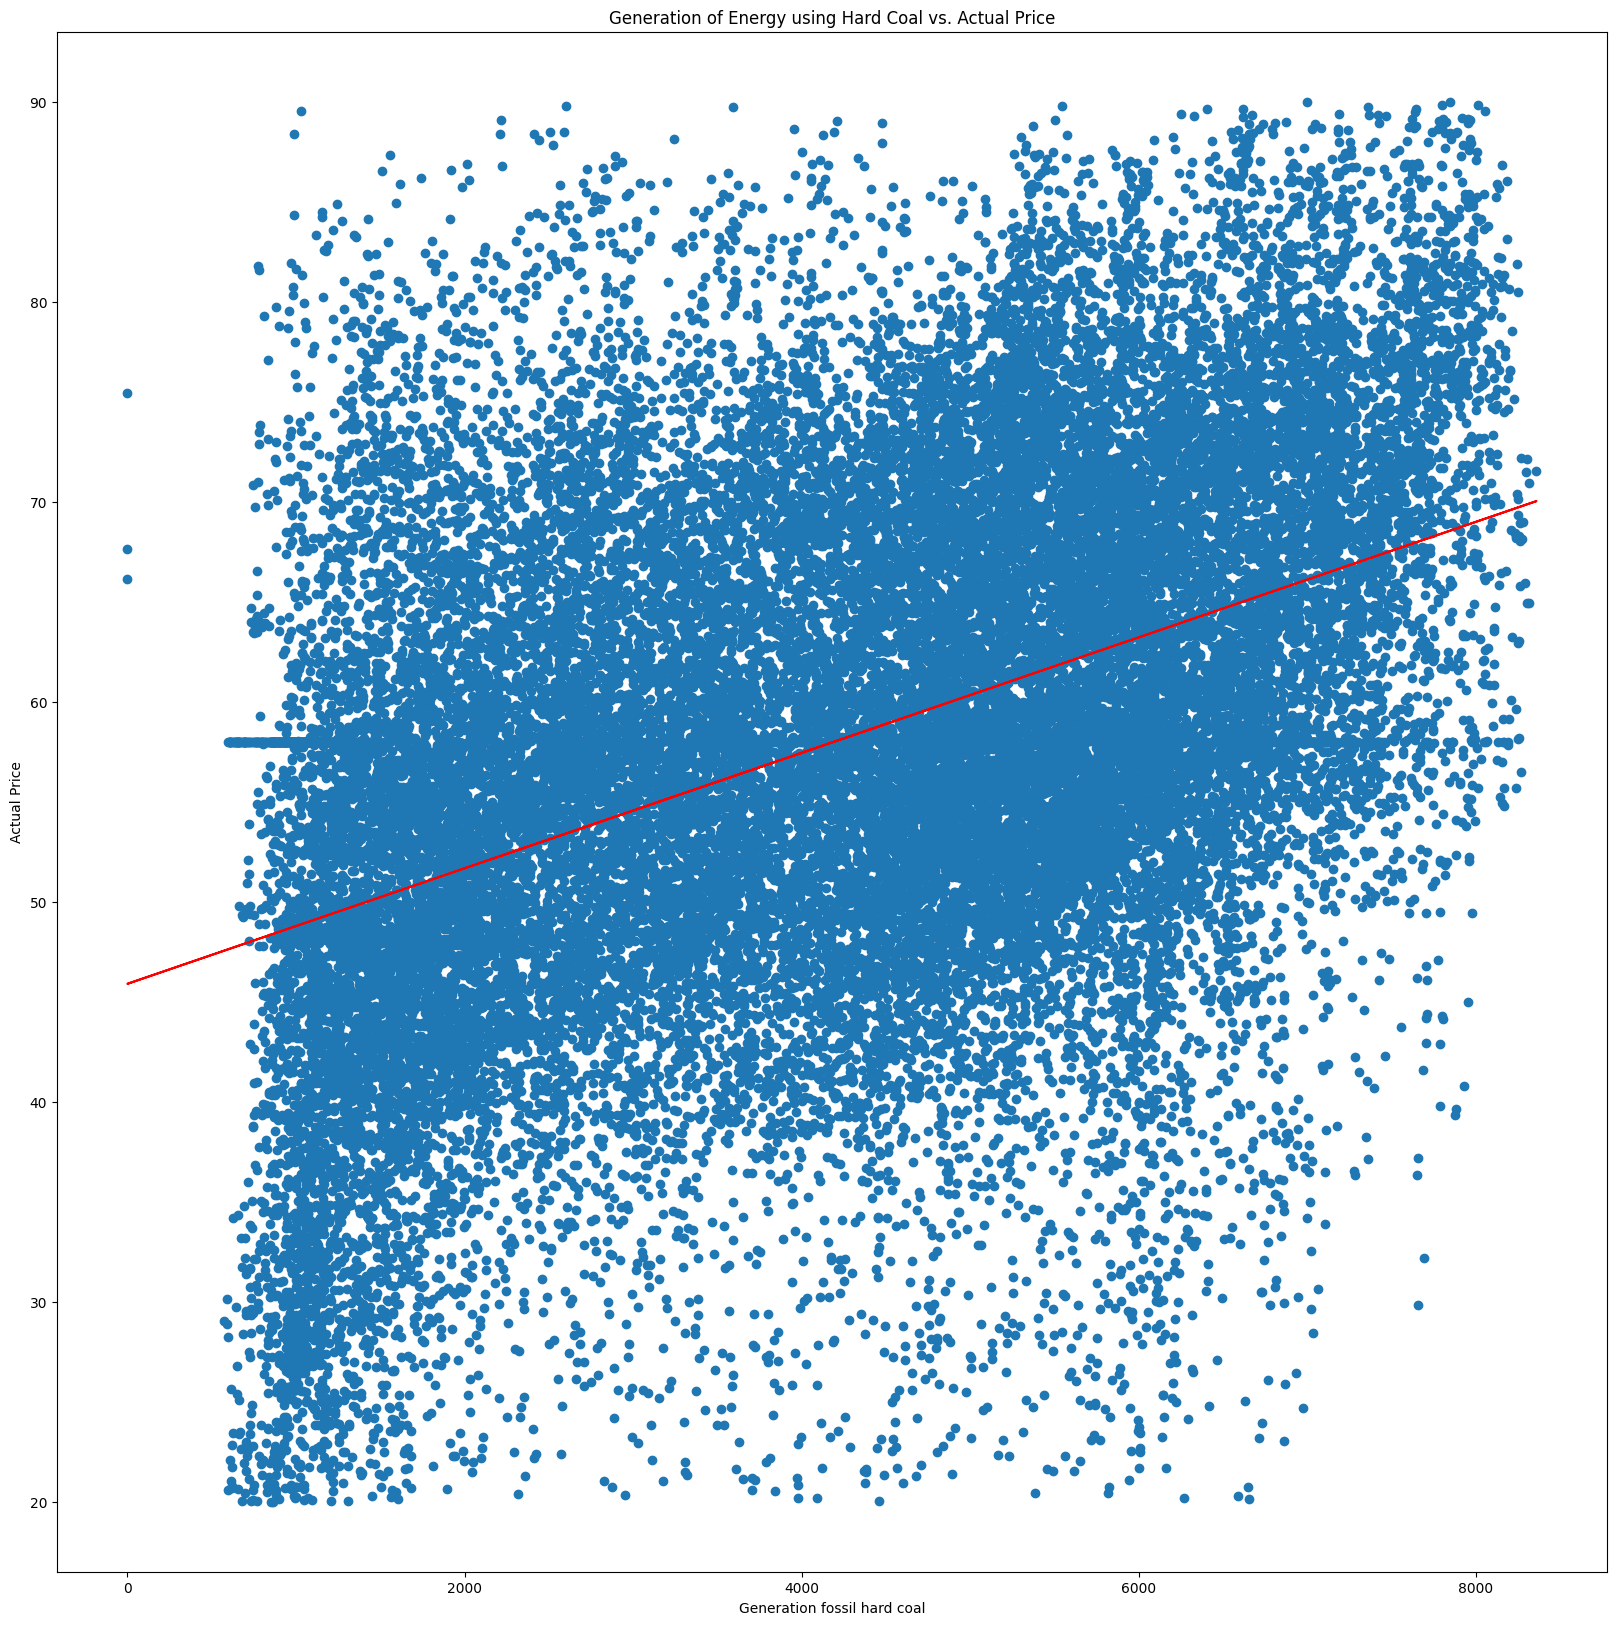

In [238]:
plt.figure(figsize=(20, 20))
a, b = np.polyfit(energy_data_cleaned_time_columns['generation fossil hard coal'], energy_data_cleaned_time_columns['price actual'], 1)
plt.scatter(energy_data_cleaned_time_columns['generation fossil hard coal'], energy_data_cleaned_time_columns['price actual'])
plt.xlabel("Generation fossil hard coal")
plt.ylabel("Actual Price")
plt.title("Generation of Energy using Hard Coal vs. Actual Price")
plt.plot(energy_data_cleaned_time_columns['generation fossil hard coal'], a*energy_data_cleaned_time_columns['generation fossil hard coal']+b, color='red')

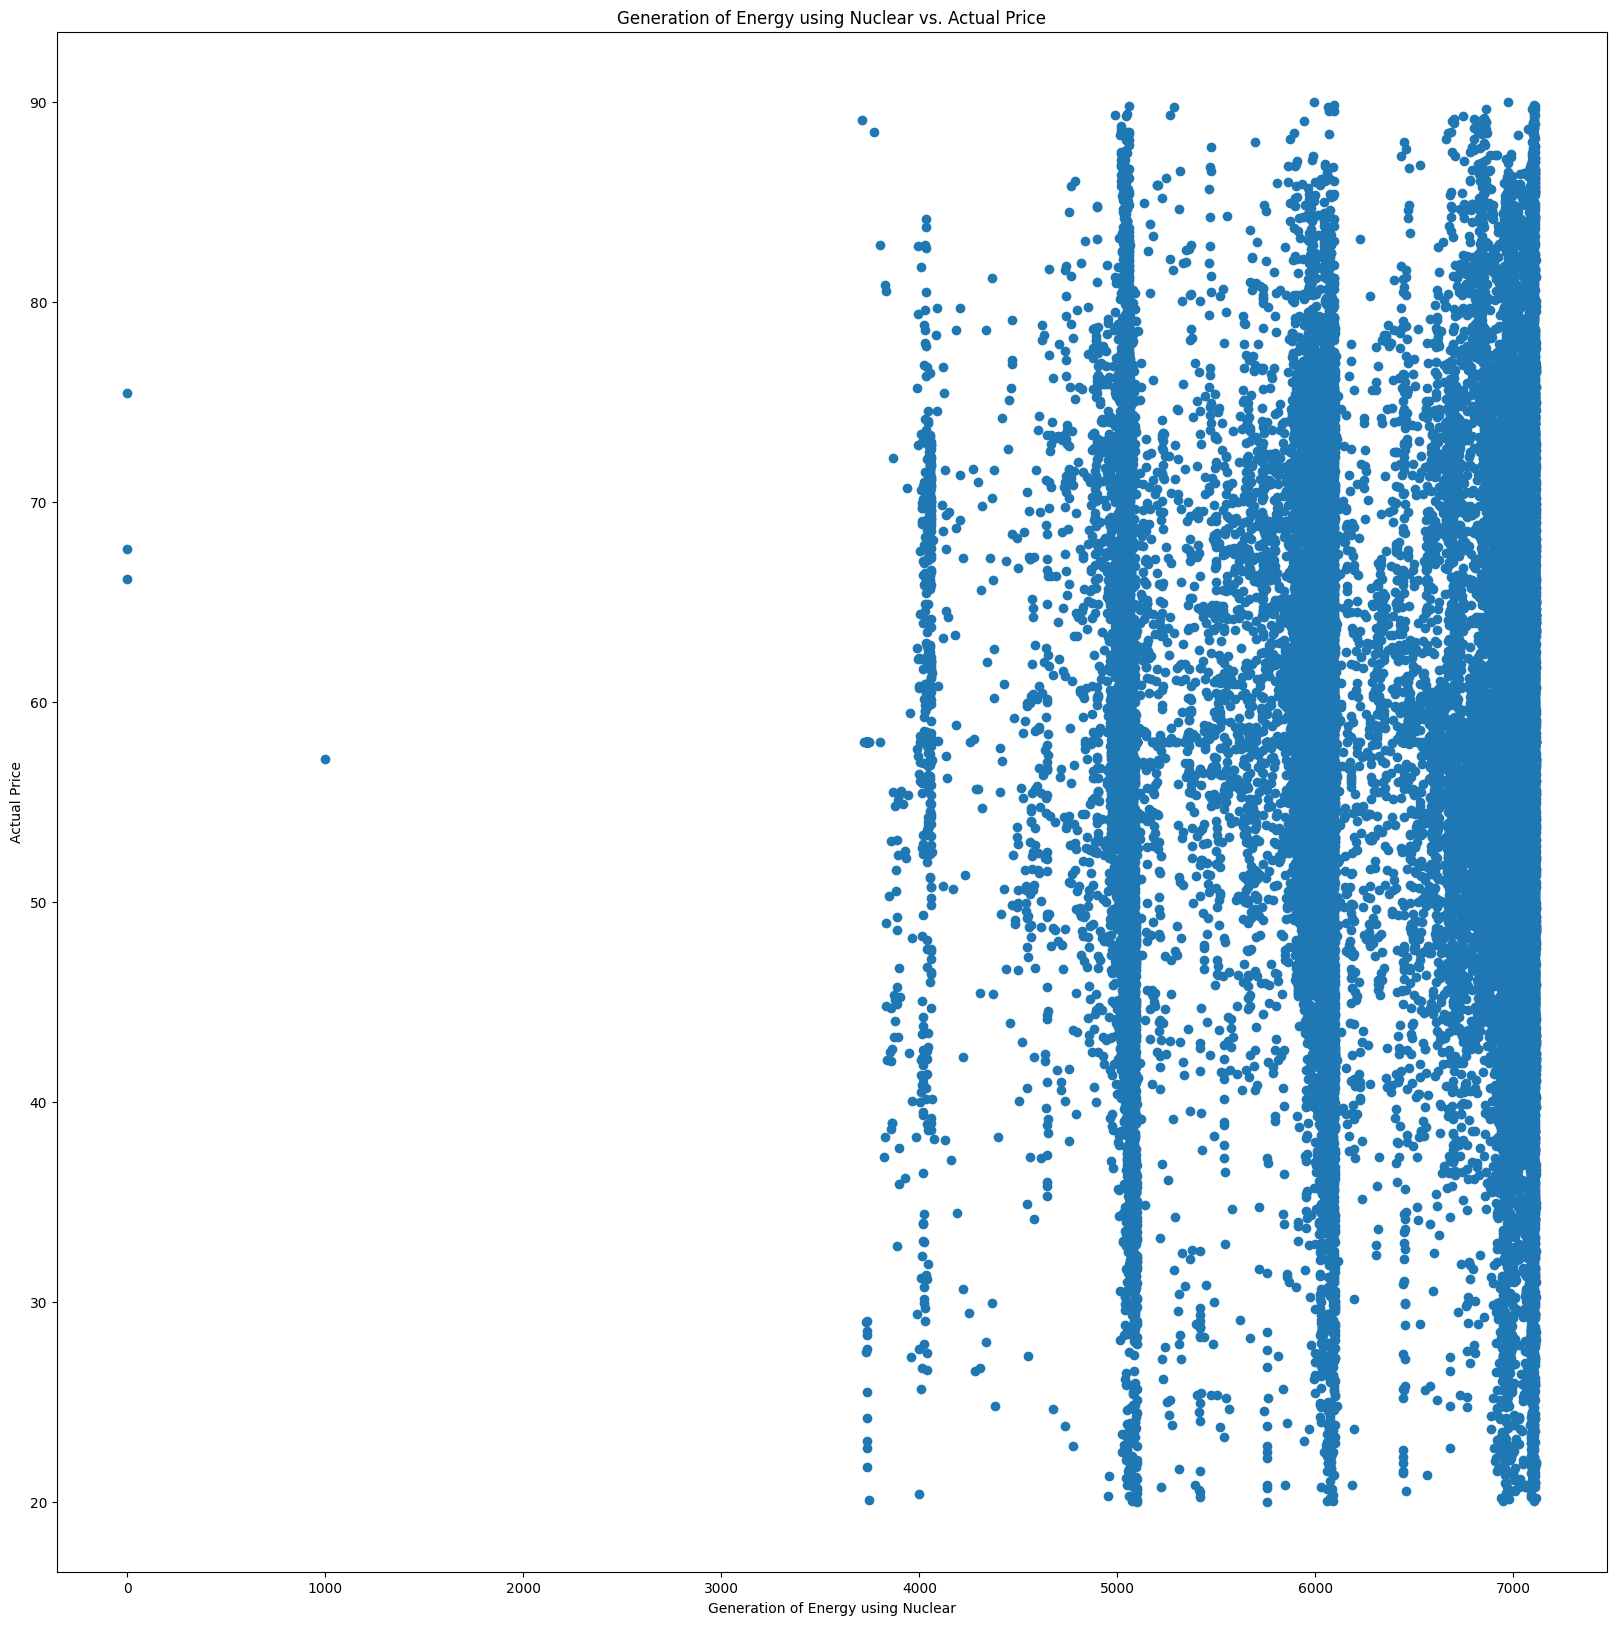

In [239]:
plt.figure(figsize=(20, 20))
plt.xlabel("Generation of Energy using Nuclear")
plt.ylabel("Actual Price")
plt.title("Generation of Energy using Nuclear vs. Actual Price")
plt.scatter(energy_data_cleaned_time_columns['generation nuclear'], energy_data_cleaned_time_columns['price actual'])


616.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7e9b0f291db0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9b0f2922f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9b0f291b10>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9b0f292830>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9b0f292ad0>],
 'means': []}

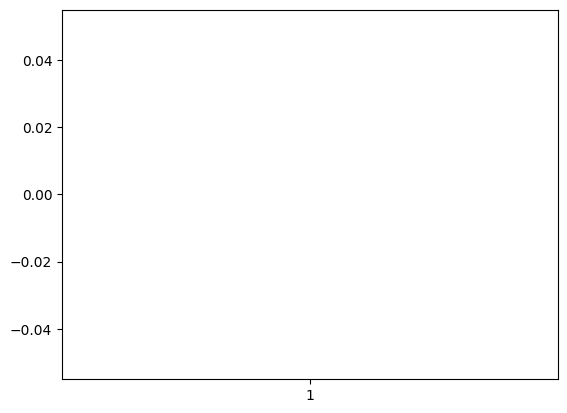

In [240]:
median = energy_data_cleaned_time_columns['generation solar'].median()
print(median)
plt.boxplot(energy_data_cleaned_time_columns["generation solar"])

616.0


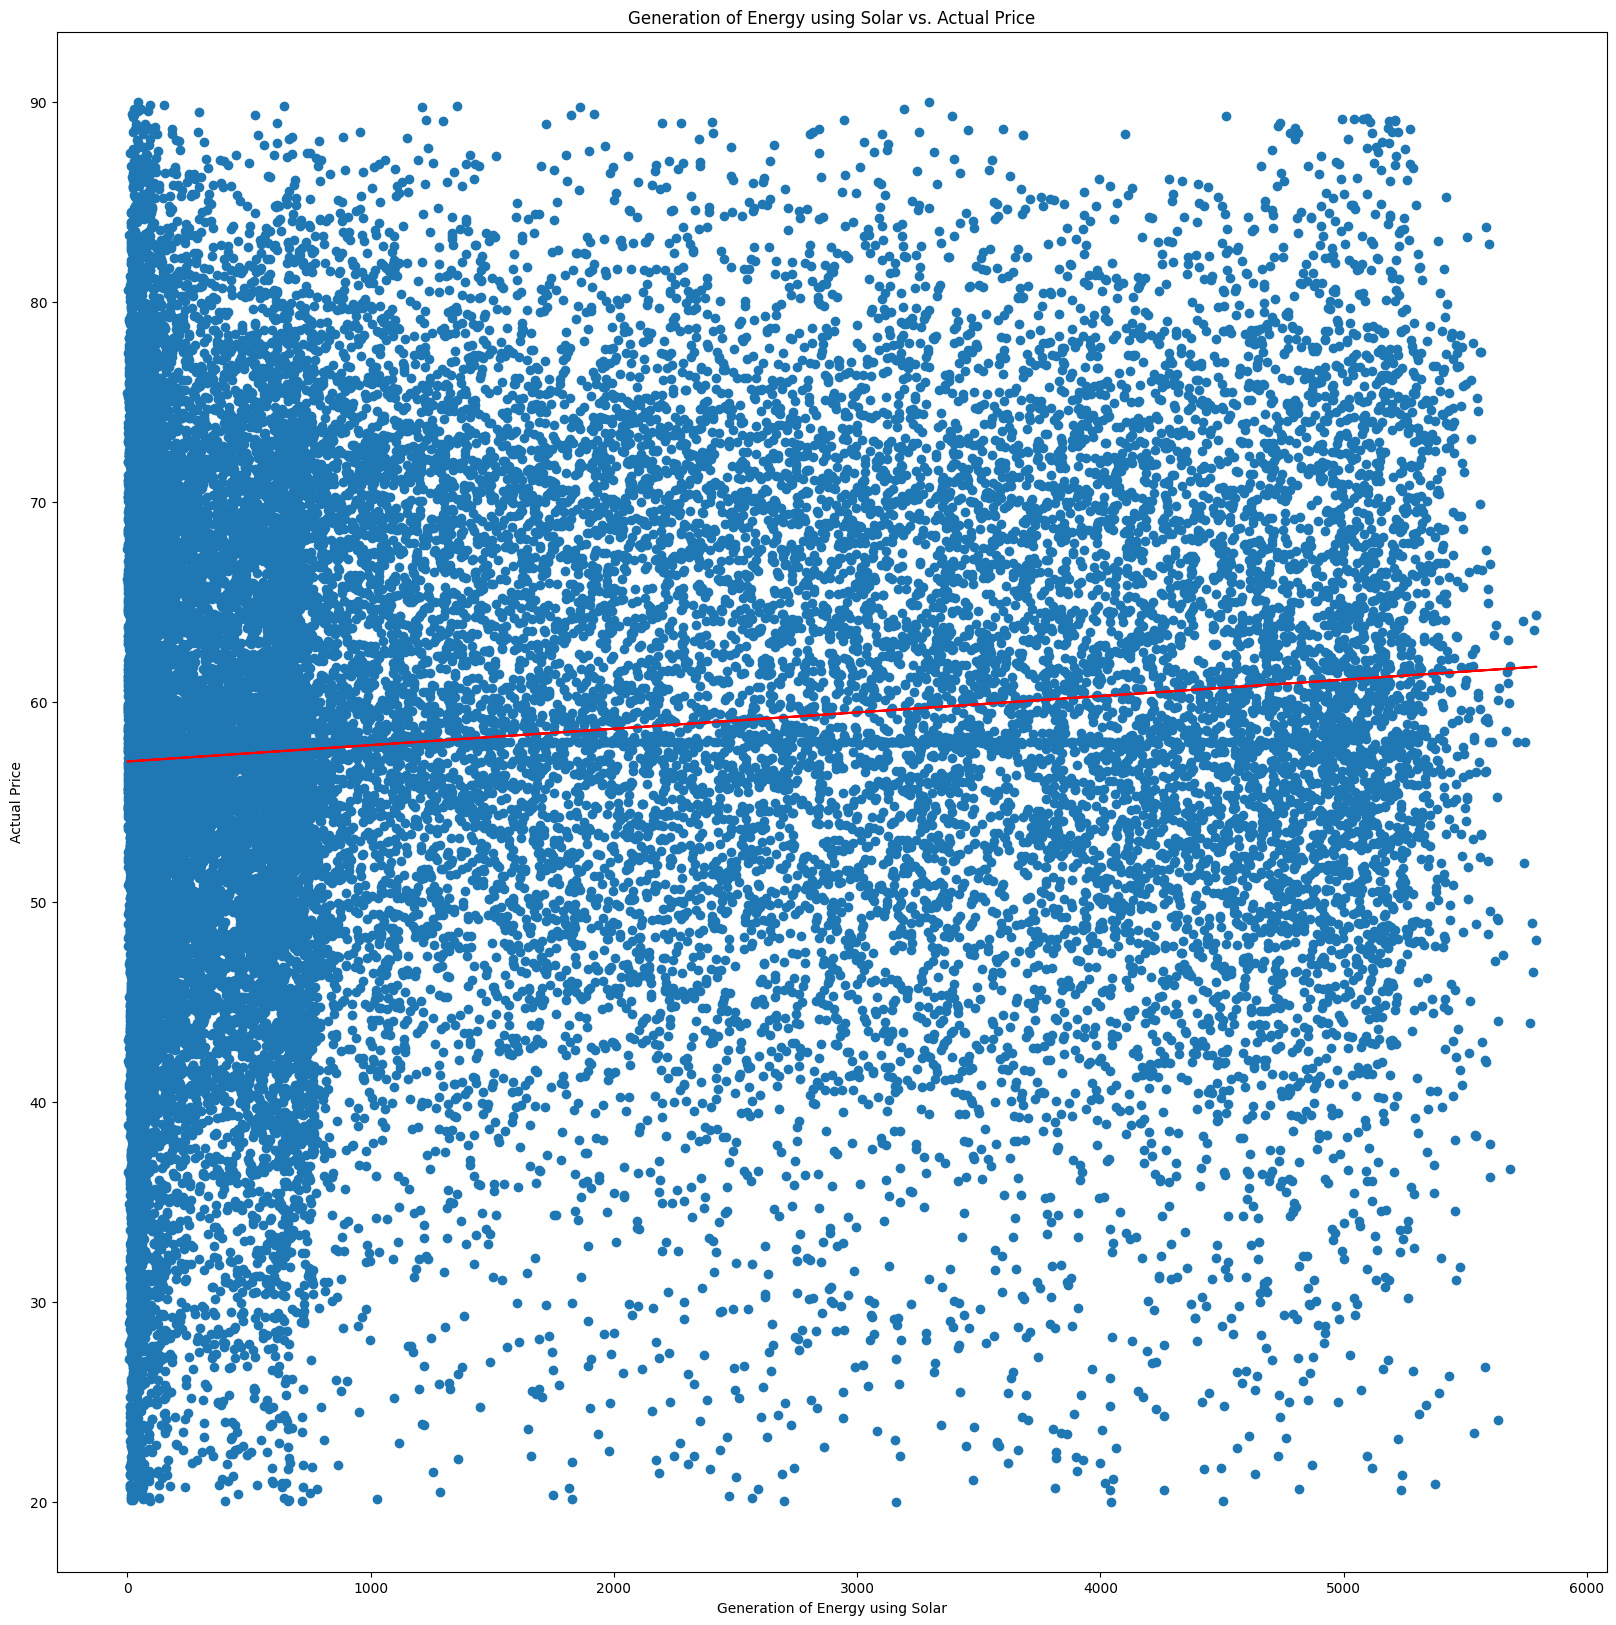

In [241]:
plt.figure(figsize=(20, 20))
median = energy_data_cleaned_time_columns['generation solar'].median()
print(median)
energy_data_cleaned_time_columns["generation solar"].fillna(median, inplace=True)
a, b = np.polyfit(energy_data_cleaned_time_columns['generation solar'], energy_data_cleaned_time_columns['price actual'], 1)
plt.xlabel("Generation of Energy using Solar")
plt.ylabel("Actual Price")
plt.title("Generation of Energy using Solar vs. Actual Price")
plt.scatter(energy_data_cleaned_time_columns['generation solar'], energy_data_cleaned_time_columns['price actual'])
plt.plot(energy_data_cleaned_time_columns['generation solar'], a*energy_data_cleaned_time_columns['generation solar']+b, color='red')


4969.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7e9b0ed55d50>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9b0ed56290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9b0ed55ab0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9b0ed567d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9b0ed56a70>],
 'means': []}

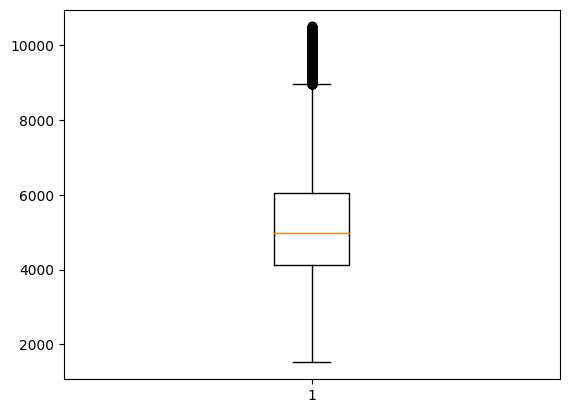

In [253]:
median = energy_data_cleaned_time_columns['generation fossil gas'].median()
print(median)
energy_data_cleaned_time_columns.loc[energy_data_cleaned_time_columns['generation fossil gas'] > 10500, 'generation fossil gas'] = median
energy_data_cleaned_time_columns.loc[energy_data_cleaned_time_columns['generation fossil gas'] < 500, 'generation fossil gas'] = median
plt.boxplot(energy_data_cleaned_time_columns["generation fossil gas"])

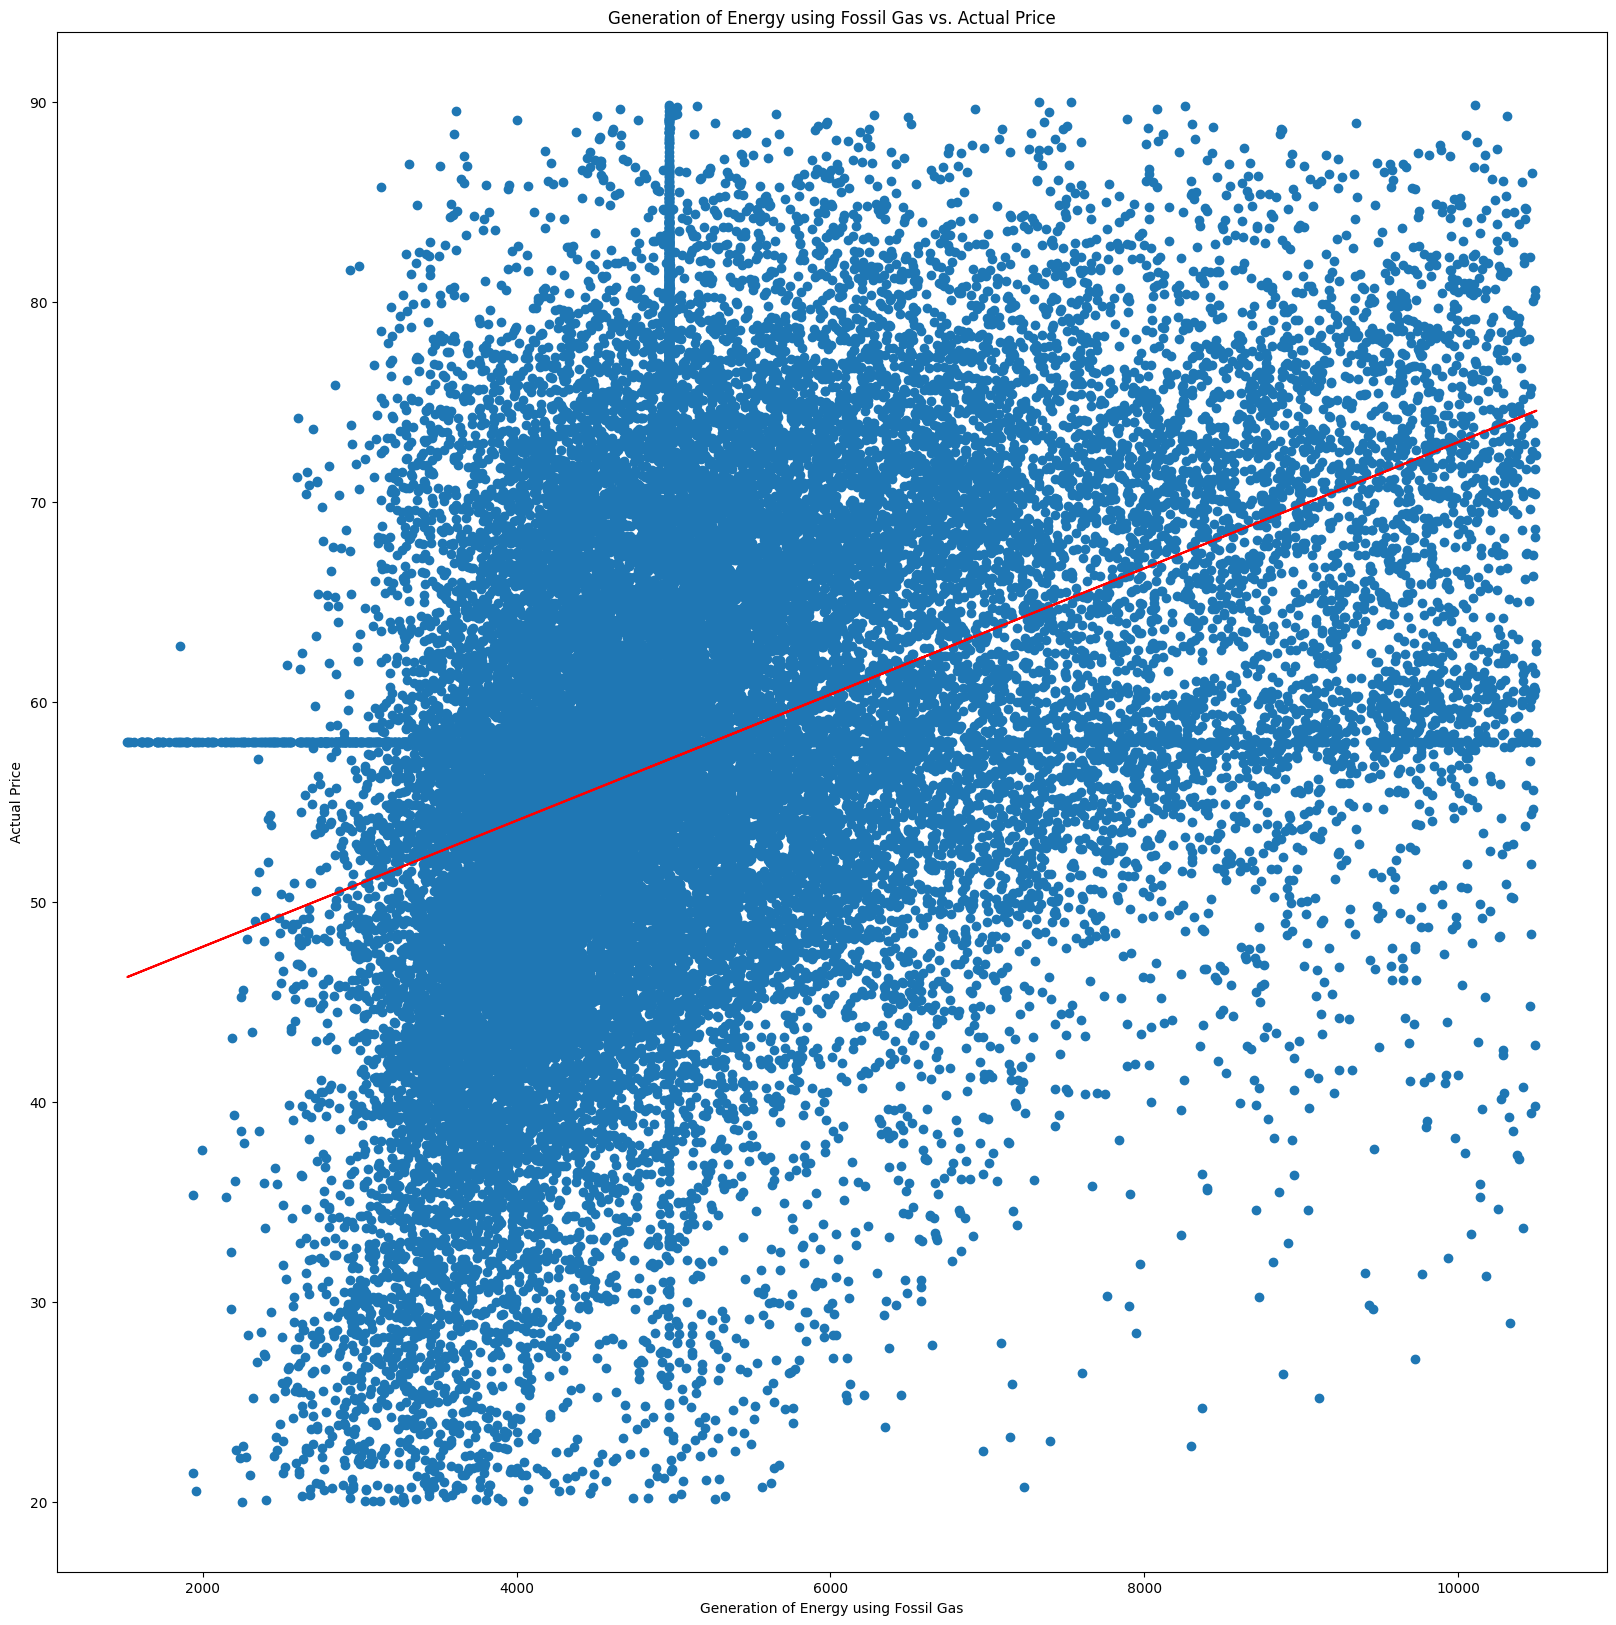

In [243]:
plt.figure(figsize=(20, 20))
energy_data_cleaned_time_columns["generation fossil gas"].fillna(median, inplace=True)
a, b = np.polyfit(energy_data_cleaned_time_columns['generation fossil gas'], energy_data_cleaned_time_columns['price actual'], 1)
plt.xlabel("Generation of Energy using Fossil Gas")
plt.ylabel("Actual Price")
plt.title("Generation of Energy using Fossil Gas vs. Actual Price")
plt.scatter(energy_data_cleaned_time_columns['generation fossil gas'], energy_data_cleaned_time_columns['price actual'])
plt.plot(energy_data_cleaned_time_columns['generation fossil gas'], a*energy_data_cleaned_time_columns['generation fossil gas']+b, color='red')

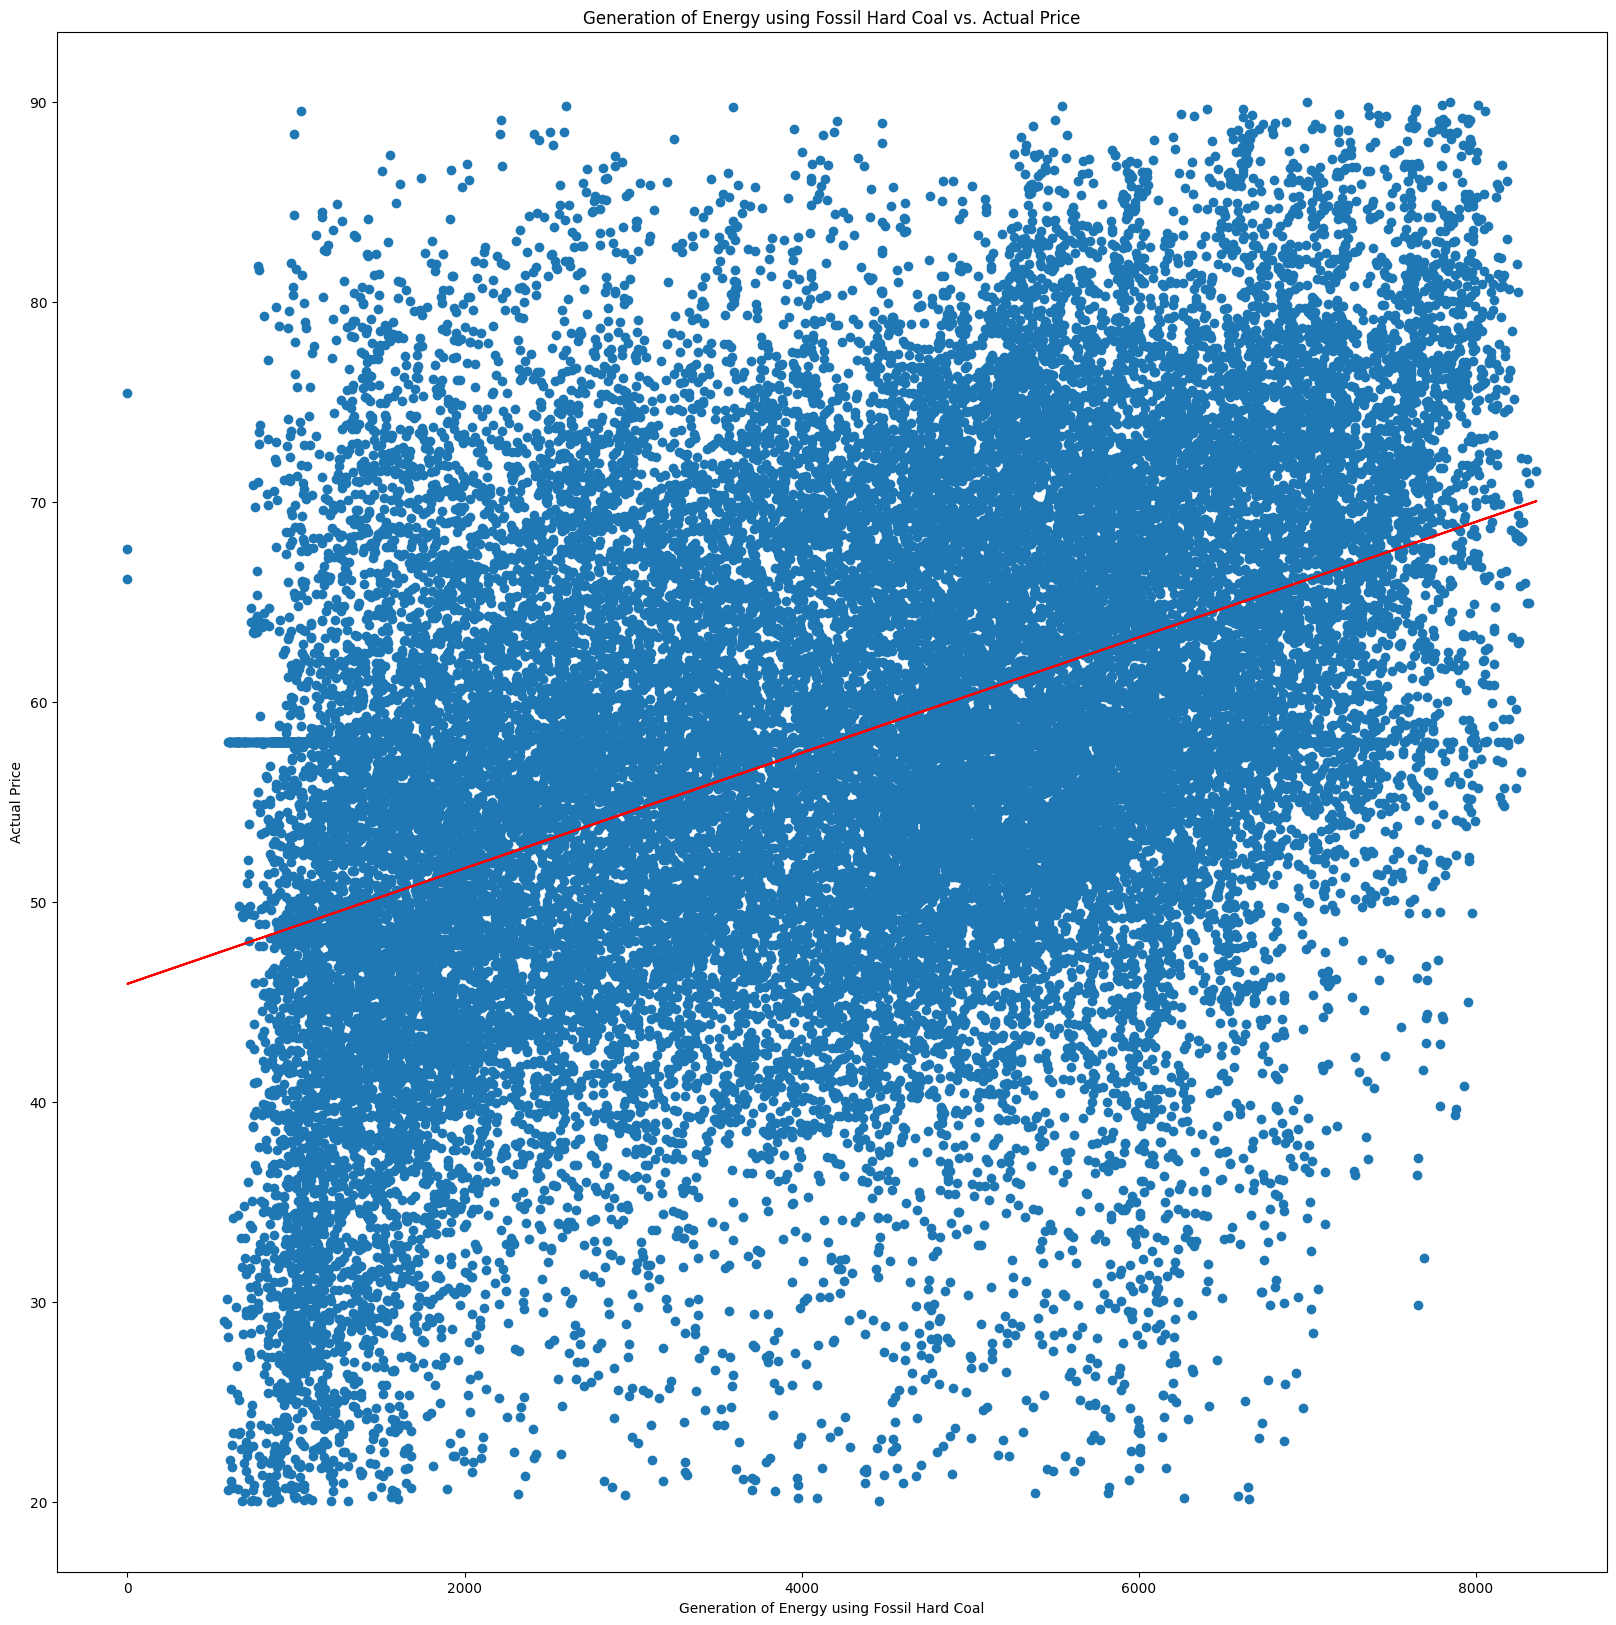

In [244]:
plt.figure(figsize=(20, 20))
a, b = np.polyfit(energy_data_cleaned_time_columns['generation fossil hard coal'], energy_data_cleaned_time_columns['price actual'], 1)
plt.xlabel("Generation of Energy using Fossil Hard Coal")
plt.ylabel("Actual Price")
plt.title("Generation of Energy using Fossil Hard Coal vs. Actual Price")
plt.scatter(energy_data_cleaned_time_columns['generation fossil hard coal'], energy_data_cleaned_time_columns['price actual'])
plt.plot(energy_data_cleaned_time_columns['generation fossil hard coal'], a*energy_data_cleaned_time_columns['generation fossil hard coal']+b, color='red')

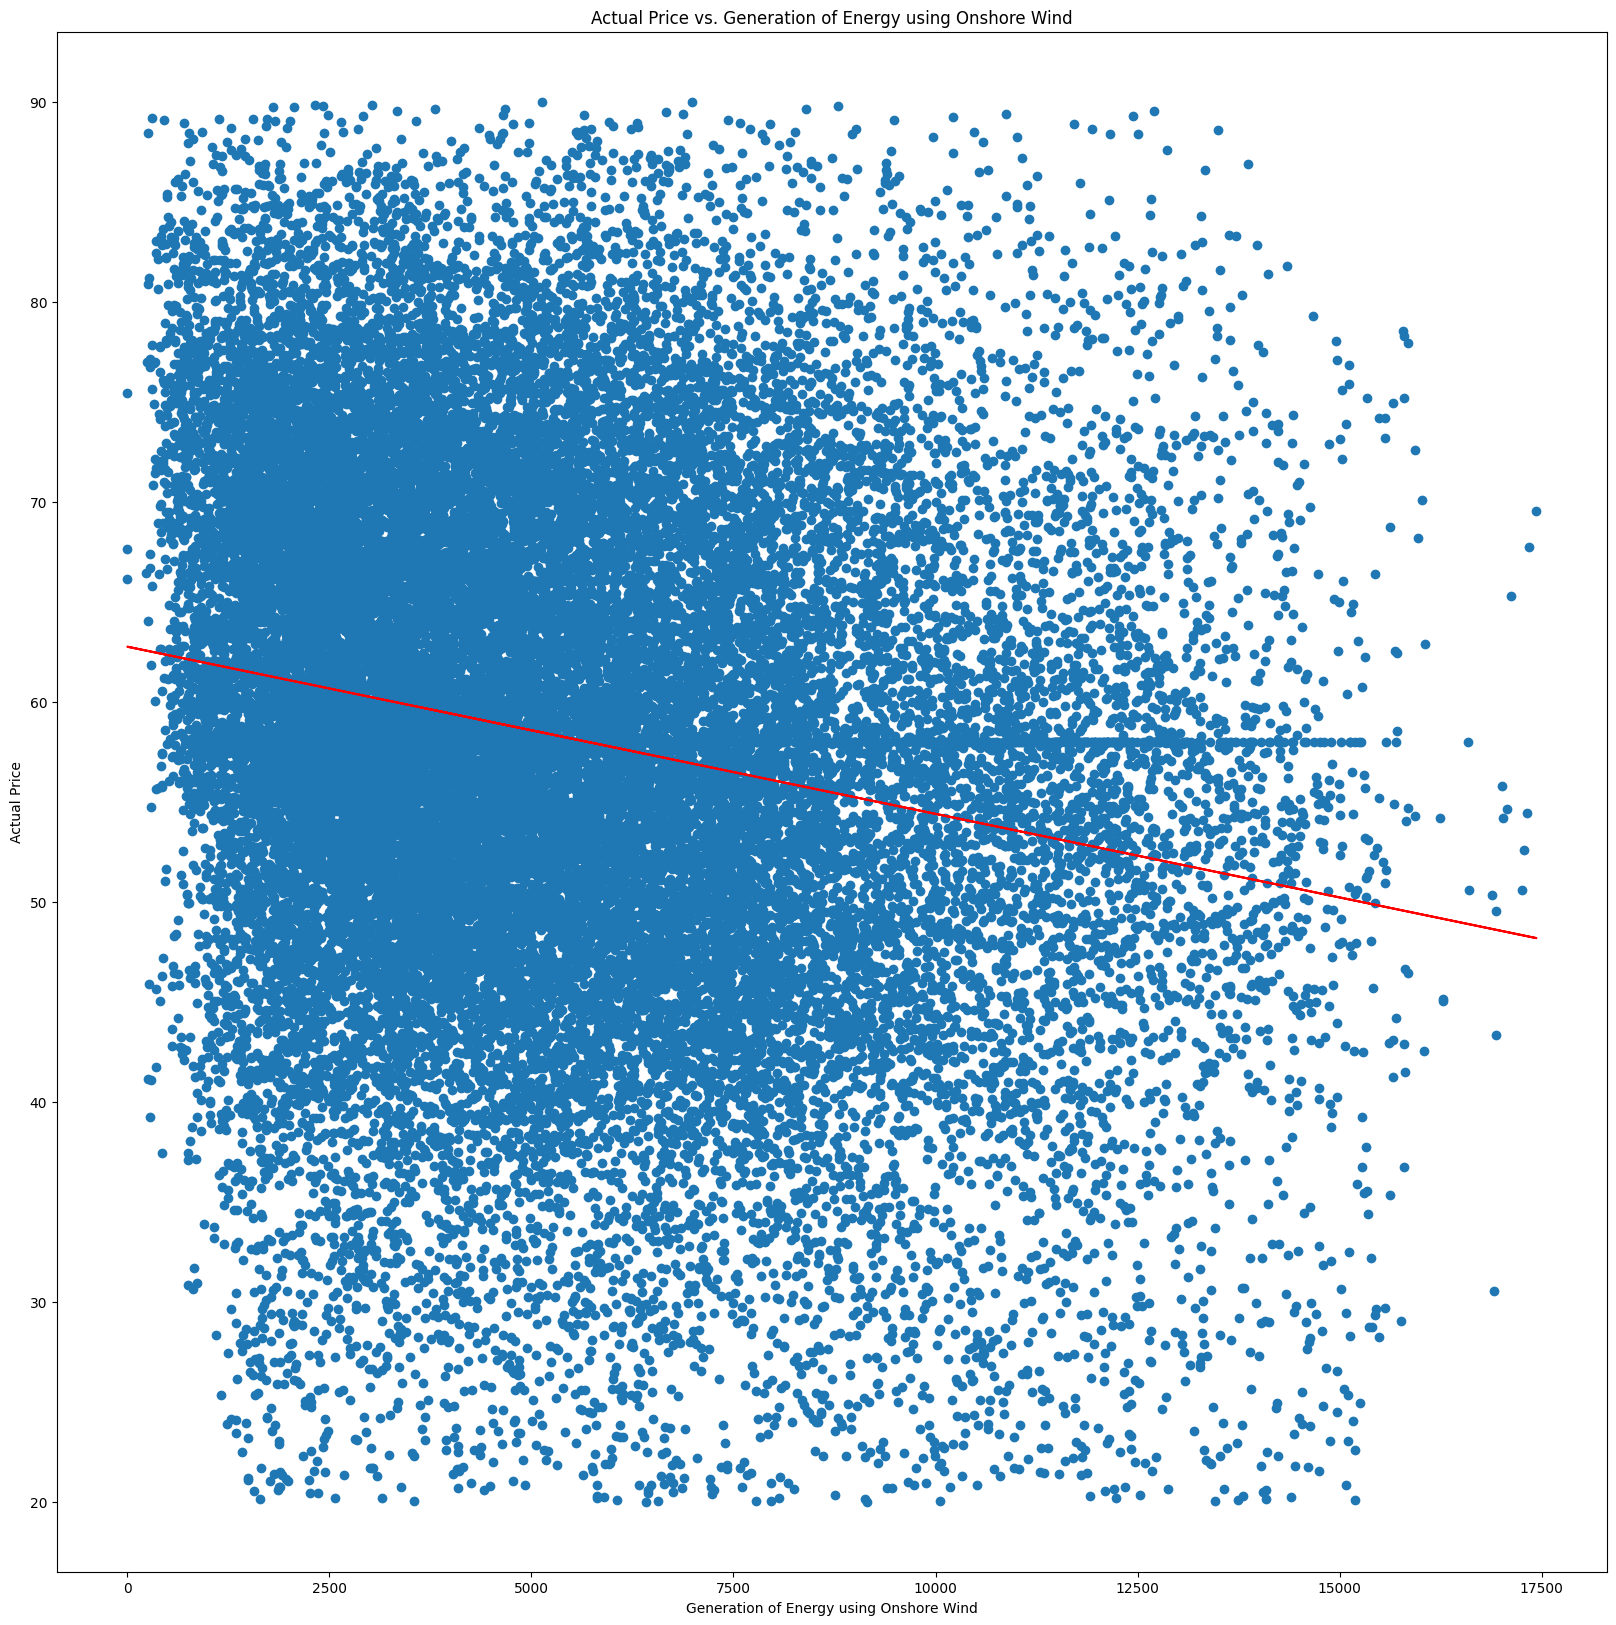

In [245]:
plt.figure(figsize=(20, 20))
energy_data_cleaned_time_columns["generation wind onshore"].fillna(median, inplace=True)
a, b = np.polyfit(energy_data_cleaned_time_columns['generation wind onshore'], energy_data_cleaned_time_columns['price actual'], 1)
plt.xlabel("Generation of Energy using Onshore Wind")
plt.ylabel("Actual Price")
plt.title("Actual Price vs. Generation of Energy using Onshore Wind")
plt.scatter(energy_data_cleaned_time_columns['generation wind onshore'], energy_data_cleaned_time_columns['price actual'])
plt.plot(energy_data_cleaned_time_columns['generation wind onshore'], a*energy_data_cleaned_time_columns['generation wind onshore']+b, color='red')

300.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7e9b0edb7370>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9b0edb78b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9b0edb70d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9b0edb47c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9b0edb7af0>],
 'means': []}

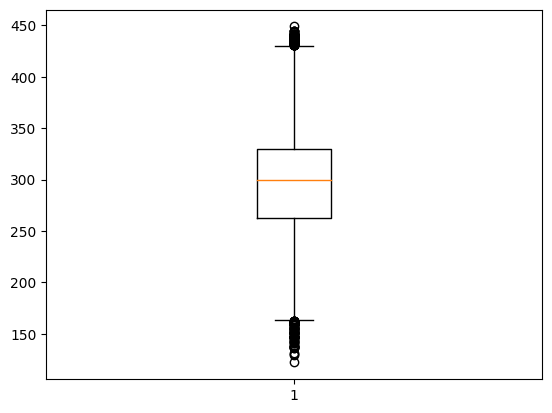

In [254]:
median = energy_data_cleaned_time_columns['generation fossil oil'].median()
print(median)
energy_data_cleaned_time_columns.loc[energy_data_cleaned_time_columns['generation fossil oil'] < 120, 'generation fossil oil'] = median
plt.boxplot(energy_data_cleaned_time_columns["generation fossil oil"])

300.0


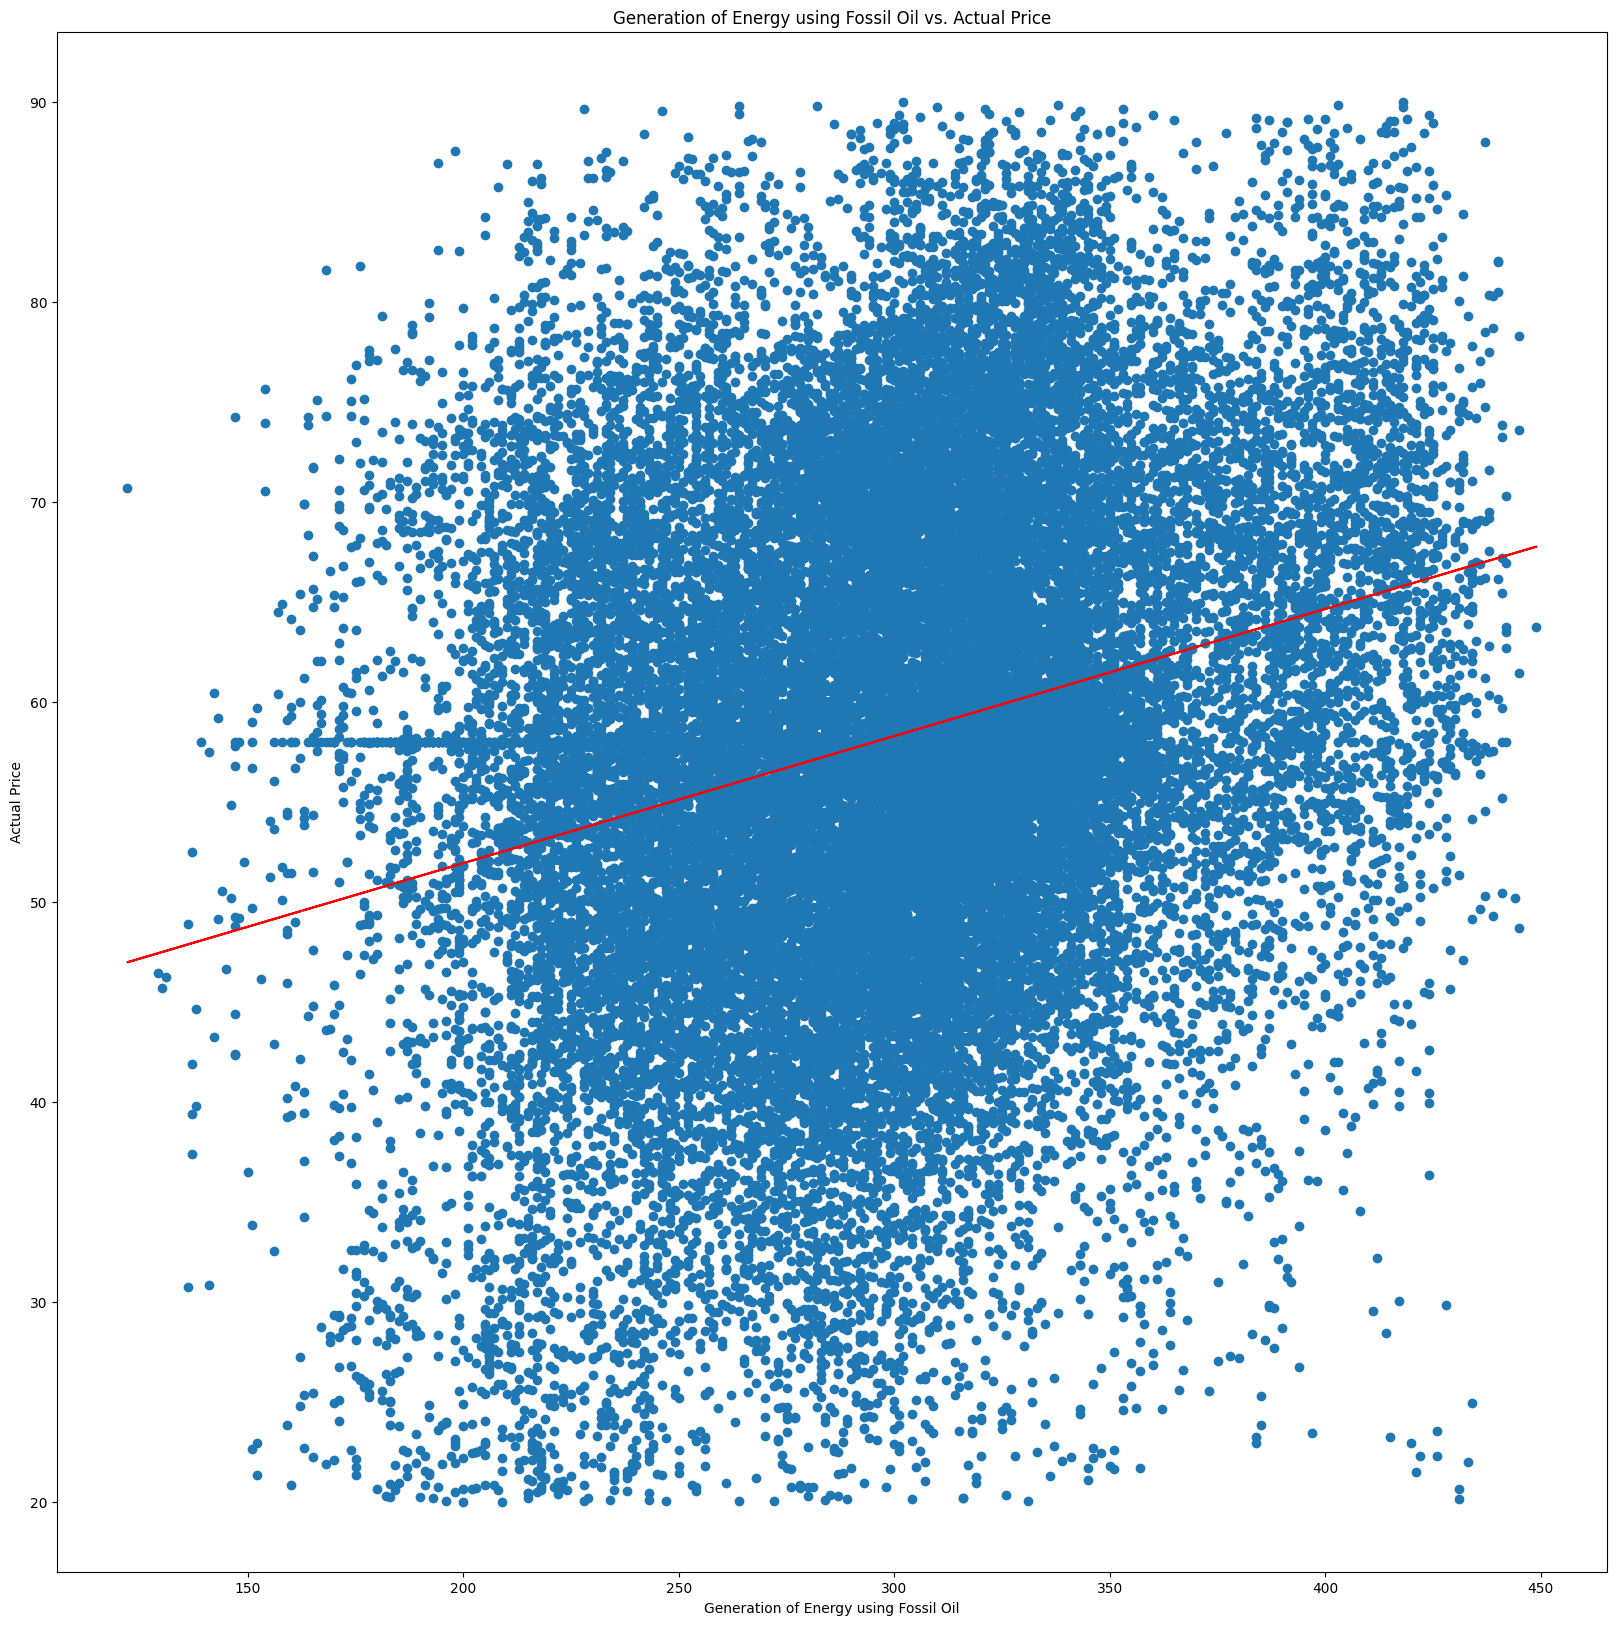

In [255]:
plt.figure(figsize=(20, 20))
median = energy_data_cleaned_time_columns['generation fossil oil'].median()
print(median)
energy_data_cleaned_time_columns["generation fossil oil"].fillna(median, inplace=True)
a, b = np.polyfit(energy_data_cleaned_time_columns['generation fossil oil'], energy_data_cleaned_time_columns['price actual'], 1)
plt.xlabel("Generation of Energy using Fossil Oil")
plt.ylabel("Actual Price")
plt.title("Generation of Energy using Fossil Oil vs. Actual Price")
plt.scatter(energy_data_cleaned_time_columns['generation fossil oil'], energy_data_cleaned_time_columns['price actual'])
plt.plot(energy_data_cleaned_time_columns['generation fossil oil'], a*energy_data_cleaned_time_columns['generation fossil oil']+b, color='red')

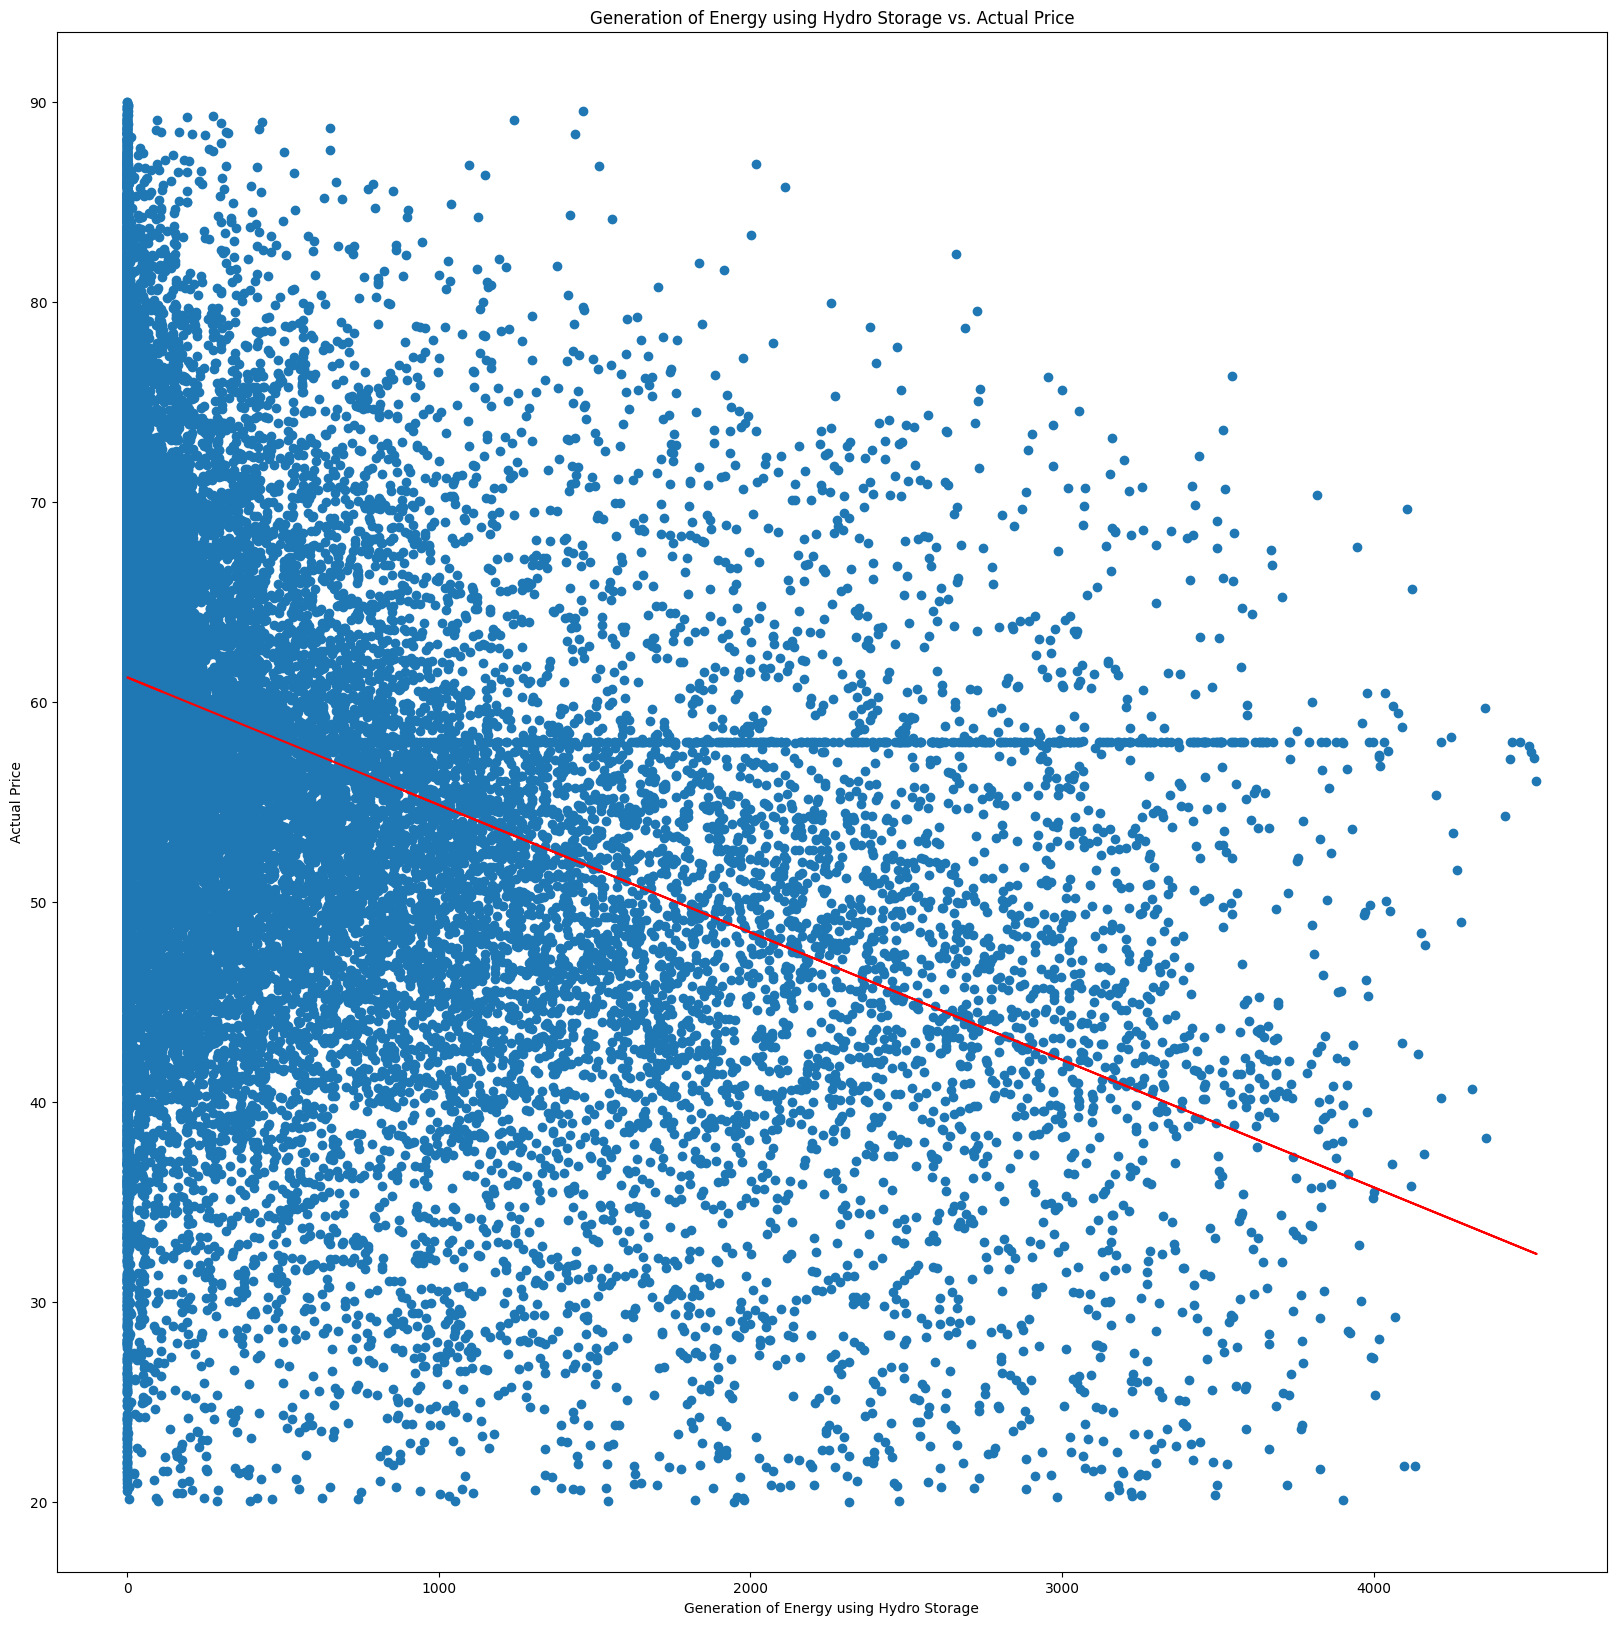

In [248]:
plt.figure(figsize=(20, 20))
energy_data_cleaned_time_columns["generation hydro pumped storage consumption"].fillna(median, inplace=True)
a, b = np.polyfit(energy_data_cleaned_time_columns['generation hydro pumped storage consumption'], energy_data_cleaned_time_columns['price actual'], 1)
plt.xlabel("Generation of Energy using Hydro Storage")
plt.ylabel("Actual Price")
plt.title("Generation of Energy using Hydro Storage vs. Actual Price")
plt.scatter(energy_data_cleaned_time_columns['generation hydro pumped storage consumption'], energy_data_cleaned_time_columns['price actual'])
plt.plot(energy_data_cleaned_time_columns['generation hydro pumped storage consumption'], a*energy_data_cleaned_time_columns['generation hydro pumped storage consumption']+b, color='red')

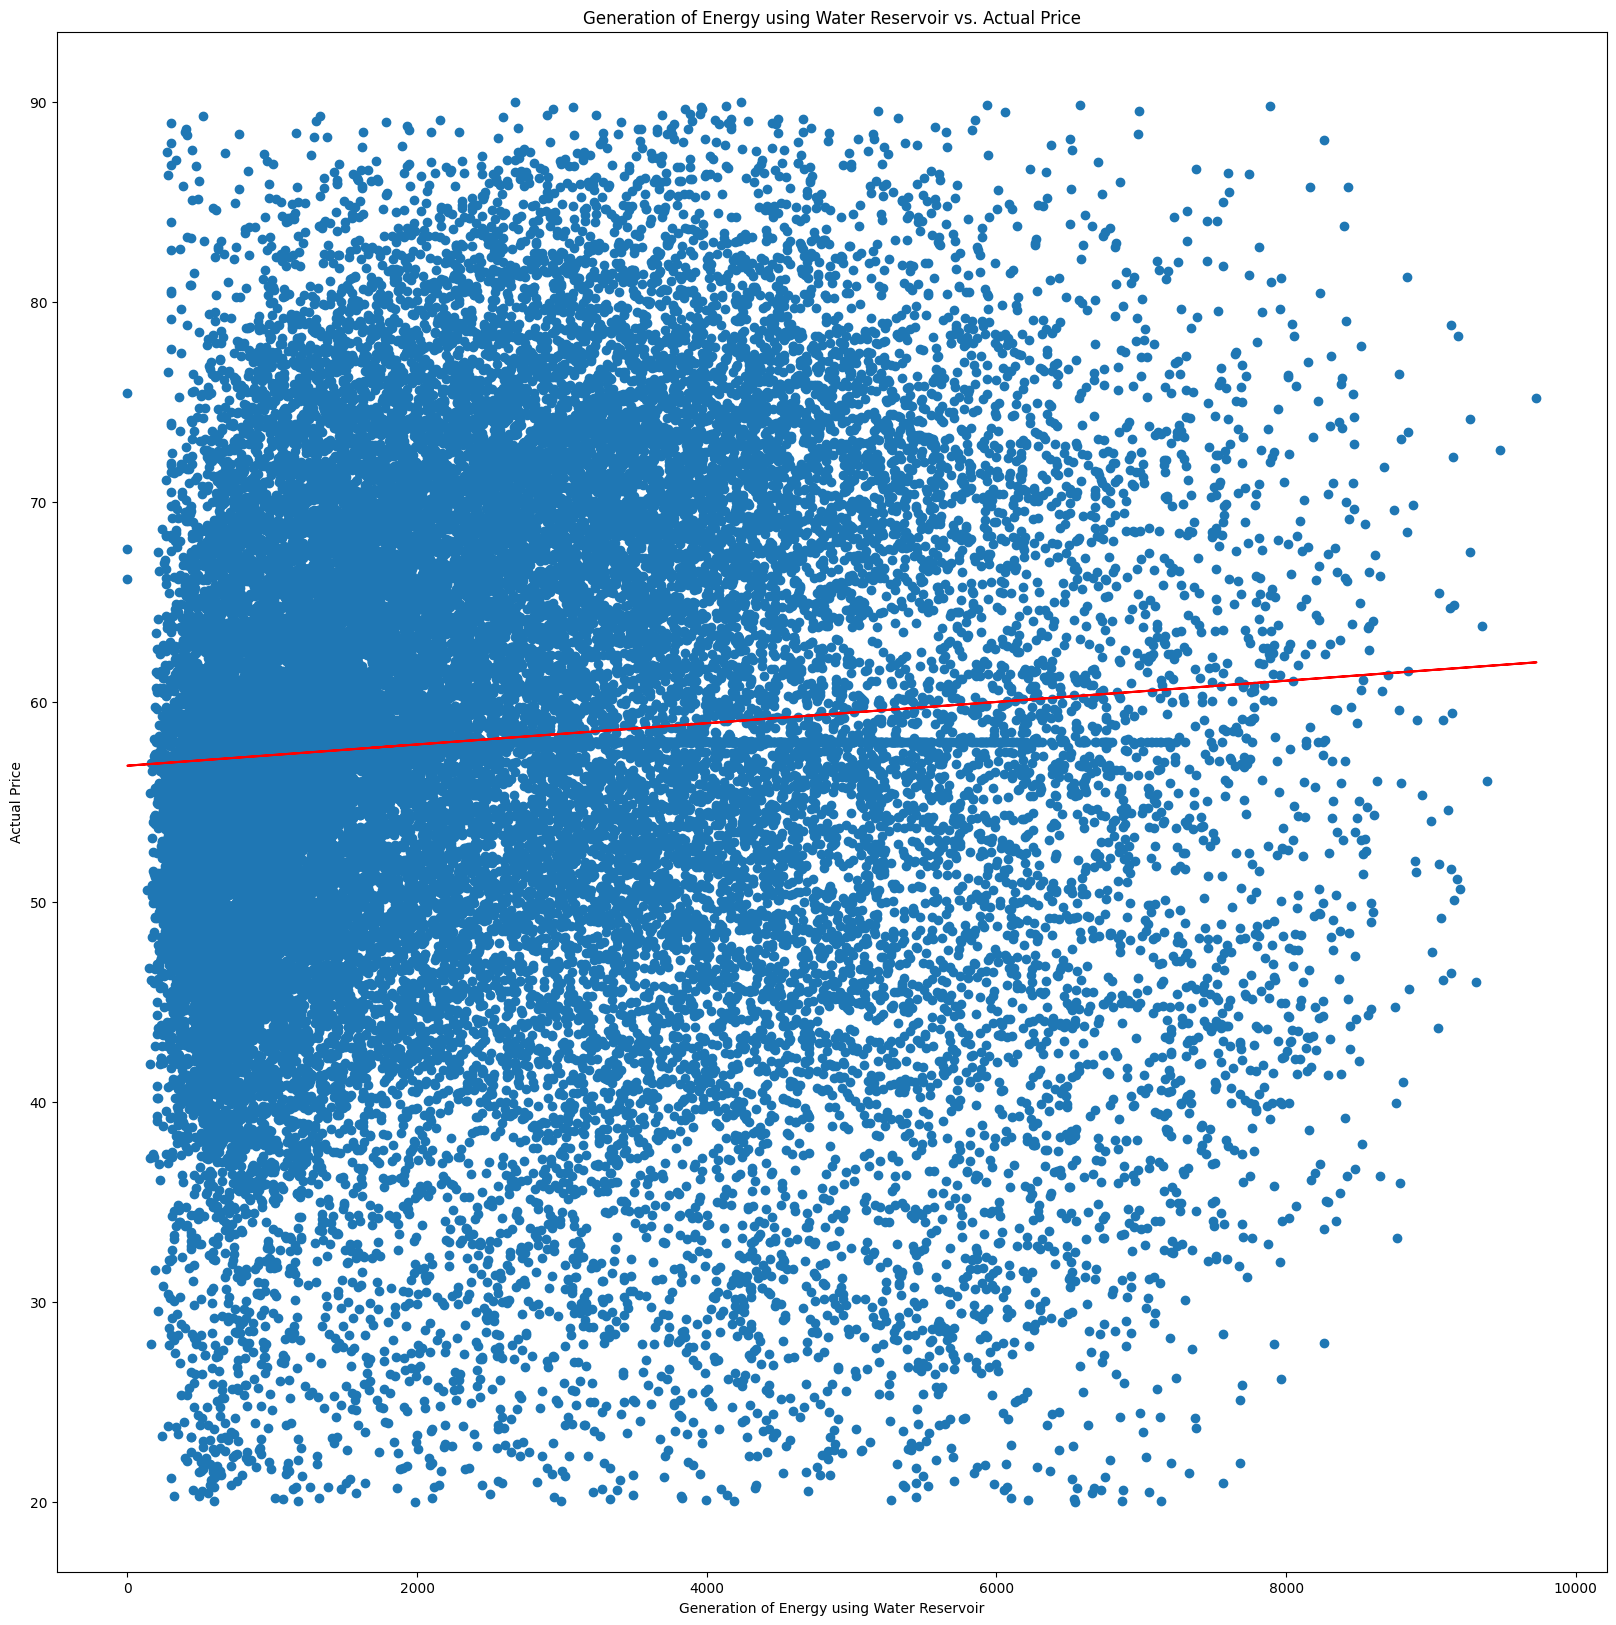

In [249]:
plt.figure(figsize=(20, 20))
energy_data_cleaned_time_columns["generation hydro water reservoir"].fillna(median, inplace=True)
a, b = np.polyfit(energy_data_cleaned_time_columns['generation hydro water reservoir'], energy_data_cleaned_time_columns['price actual'], 1)
plt.xlabel("Generation of Energy using Water Reservoir")
plt.ylabel("Actual Price")
plt.title("Generation of Energy using Water Reservoir vs. Actual Price")
plt.scatter(energy_data_cleaned_time_columns['generation hydro water reservoir'], energy_data_cleaned_time_columns['price actual'])
plt.plot(energy_data_cleaned_time_columns['generation hydro water reservoir'], a*energy_data_cleaned_time_columns['generation hydro water reservoir']+b, color='red')

905.0


{'whiskers': [<matplotlib.lines.Line2D at 0x7e9b0ecb8dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e9b0ecb9300>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e9b0ecb8b20>],
 'medians': [<matplotlib.lines.Line2D at 0x7e9b0ecb9840>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e9b0ecb9ae0>],
 'means': []}

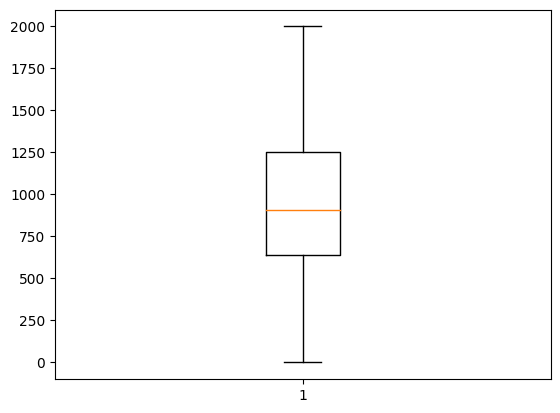

In [256]:
median = energy_data_cleaned_time_columns['generation hydro run-of-river and poundage'].median()
print(median)
#energy_data_cleaned_time_columns.loc[energy_data_cleaned_time_columns['generation fossil oil'] > 10500, 'generation fossil oil'] = median
#energy_data_cleaned_time_columns.loc[energy_data_cleaned_time_columns['generation fossil oil'] < 120, 'generation fossil oil'] = median
plt.boxplot(energy_data_cleaned_time_columns["generation hydro run-of-river and poundage"])

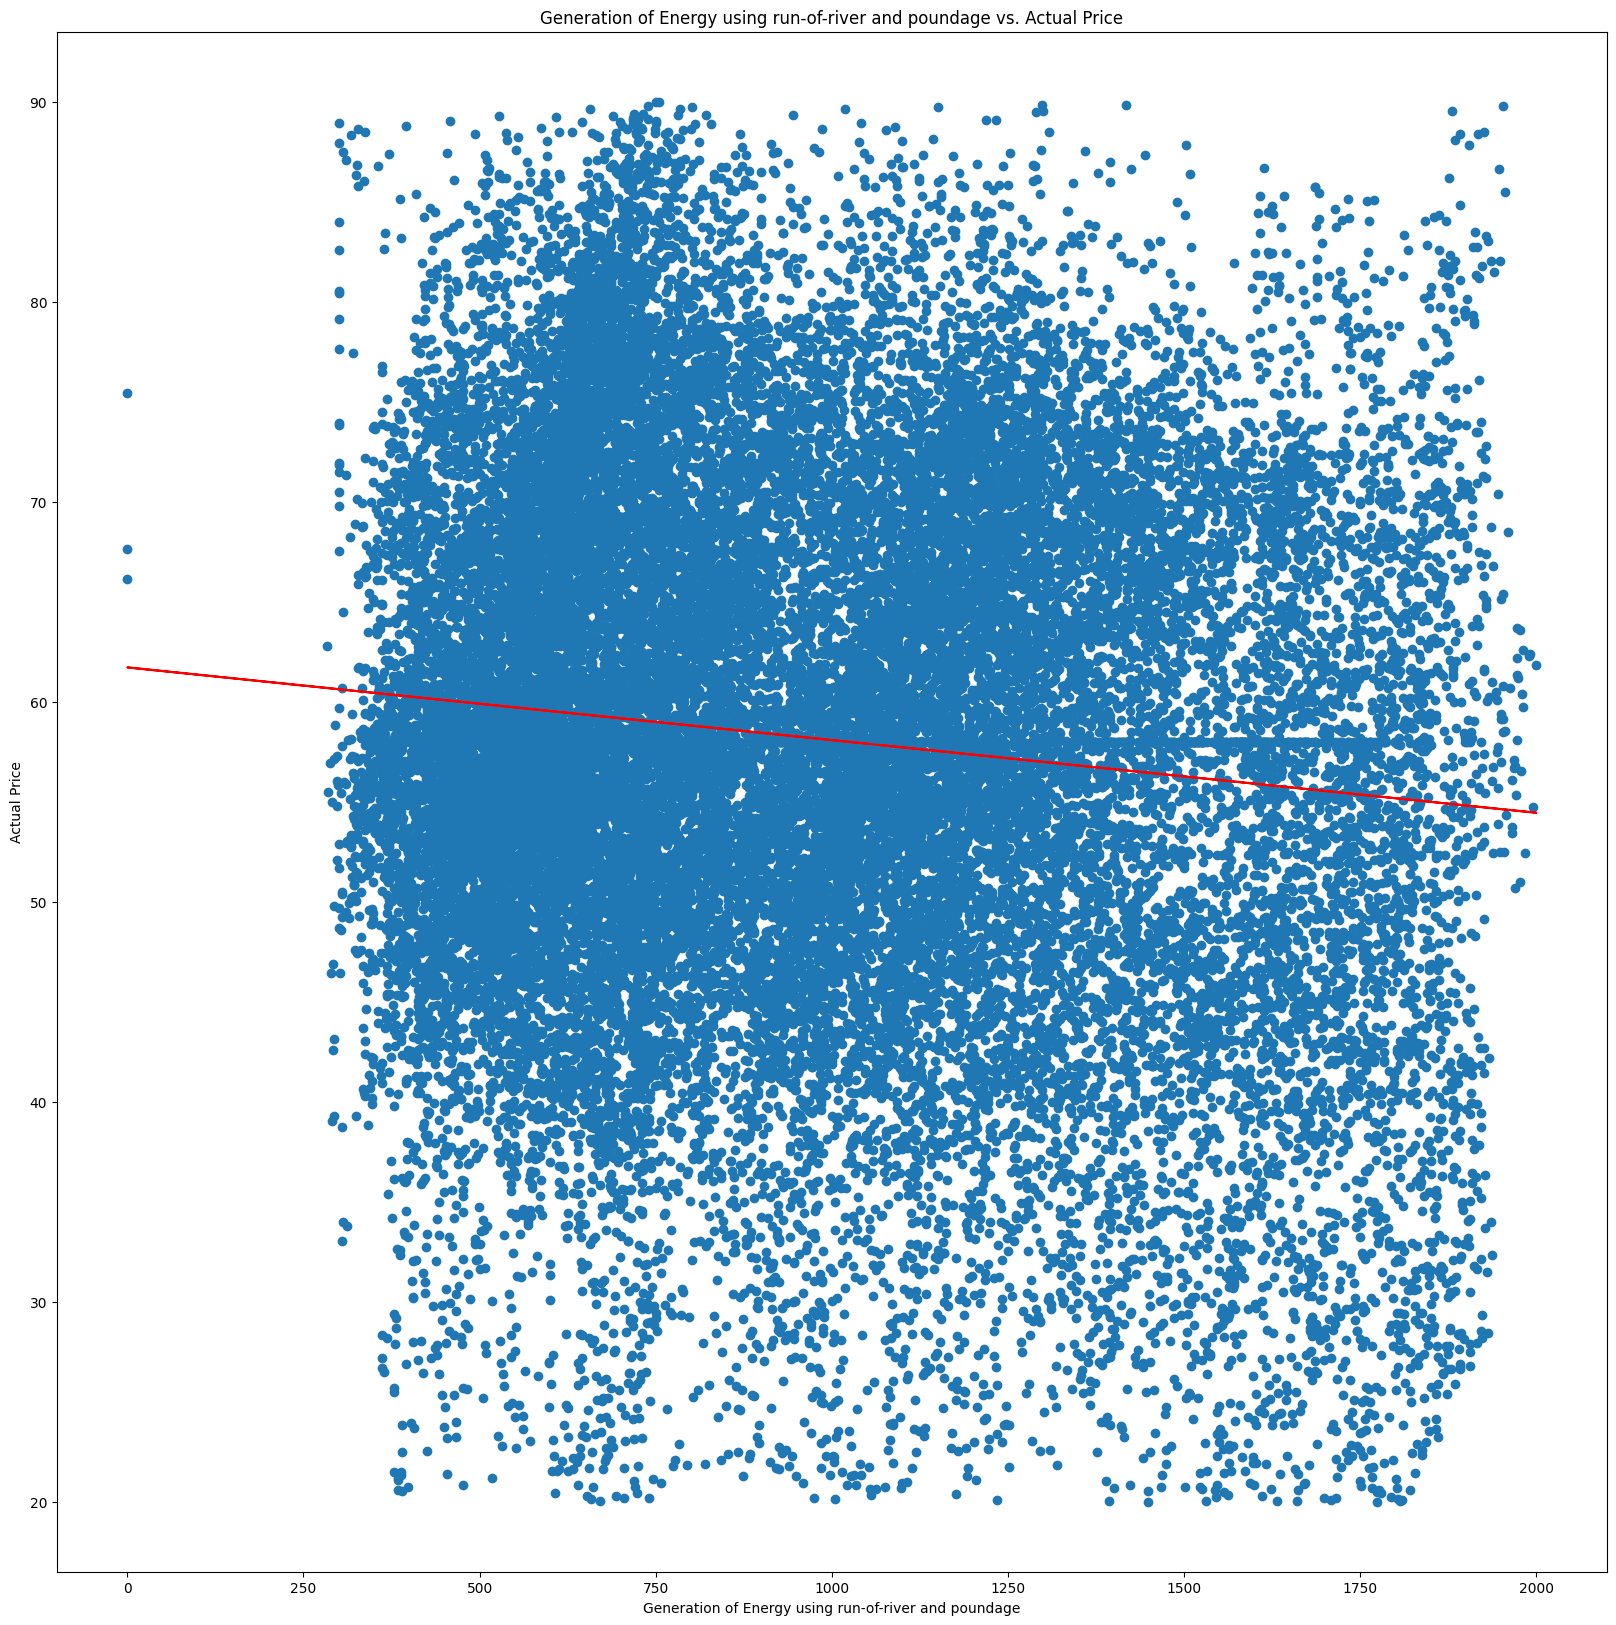

In [250]:
plt.figure(figsize=(20, 20))
energy_data_cleaned_time_columns["generation hydro run-of-river and poundage"].fillna(median, inplace=True)
a, b = np.polyfit(energy_data_cleaned_time_columns['generation hydro run-of-river and poundage'], energy_data_cleaned_time_columns['price actual'], 1)
plt.xlabel("Generation of Energy using run-of-river and poundage")
plt.ylabel("Actual Price")
plt.title("Generation of Energy using run-of-river and poundage vs. Actual Price")
plt.scatter(energy_data_cleaned_time_columns['generation hydro run-of-river and poundage'], energy_data_cleaned_time_columns['price actual'])
plt.plot(energy_data_cleaned_time_columns['generation hydro run-of-river and poundage'], a*energy_data_cleaned_time_columns['generation hydro run-of-river and poundage']+b, color='red')

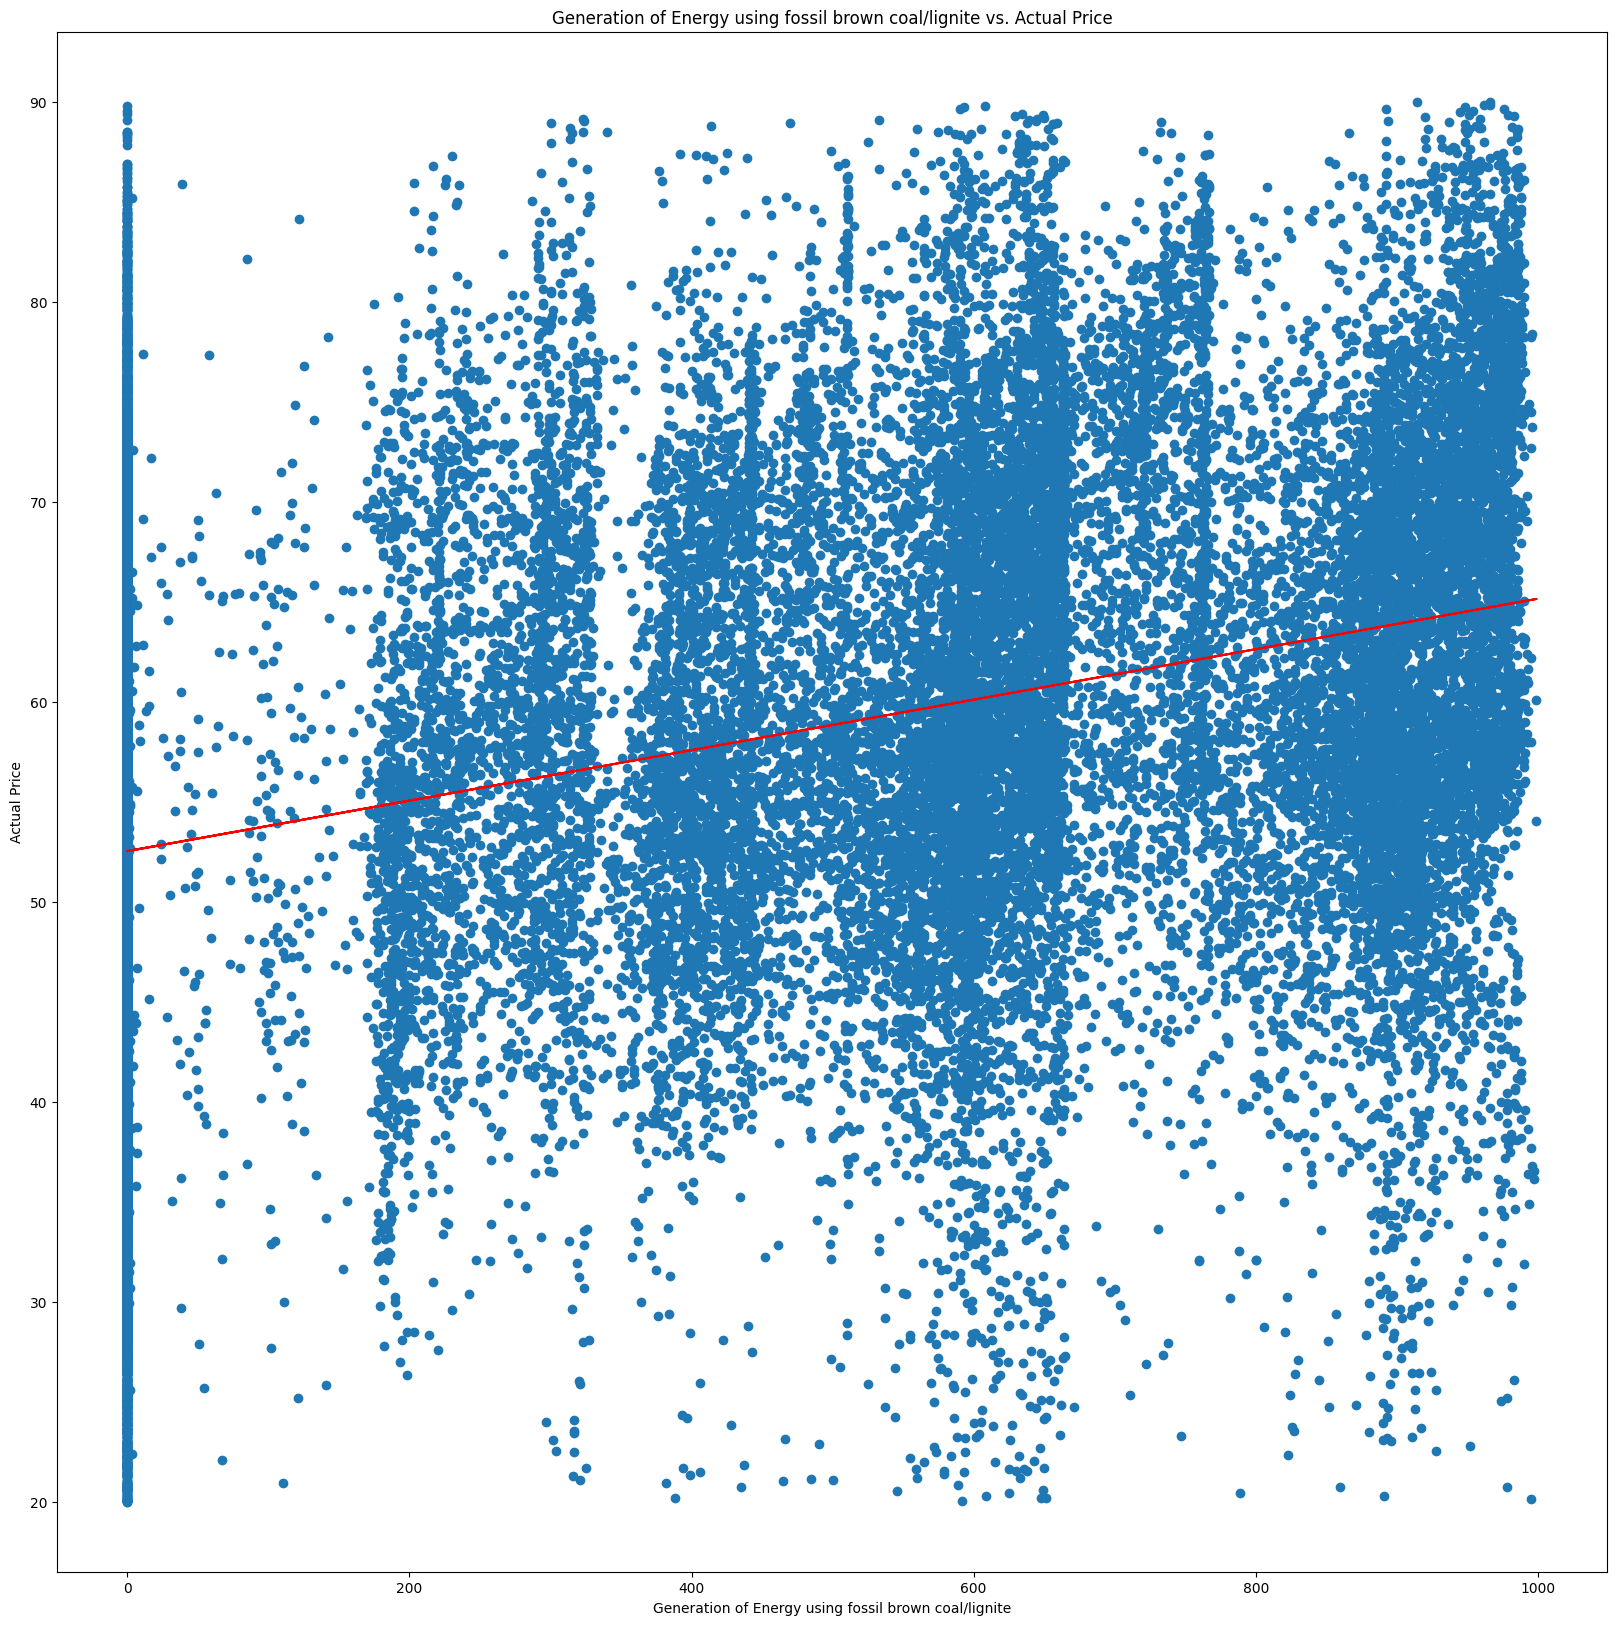

In [251]:
plt.figure(figsize=(20, 20))
energy_data_cleaned_time_columns["generation fossil brown coal/lignite"].fillna(median, inplace=True)
a, b = np.polyfit(energy_data_cleaned_time_columns['generation fossil brown coal/lignite'], energy_data_cleaned_time_columns['price actual'], 1)
plt.xlabel("Generation of Energy using fossil brown coal/lignite")
plt.ylabel("Actual Price")
plt.title("Generation of Energy using fossil brown coal/lignite vs. Actual Price")
plt.scatter(energy_data_cleaned_time_columns['generation fossil brown coal/lignite'], energy_data_cleaned_time_columns['price actual'])
plt.plot(energy_data_cleaned_time_columns['generation fossil brown coal/lignite'], a*energy_data_cleaned_time_columns['generation fossil brown coal/lignite']+b, color='red')